# Исследование данных национального виктимизационного опроса

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/C2OTH9

### учебный ноутбук для программистов на Python

* показана визуализация данных опроса, произведённого Институтом проблем правоприменения при ЕУ СПб
* написана библиотека визуализации ответов определённого вида
* библиотека и код могут использоваться и для других табличных данных


**Автор:** Александр Дьяконов, https://dyakonov.org/ag/

**Версия:** 29.07.2019

Данный код выложен здесь: https://github.com/Dyakonov/visualization


In [2]:
# импорт всеx необходимых библиотек
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
%pylab inline

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-dark')
plt.rc('font', size=14)

Populating the interactive namespace from numpy and matplotlib


# Загружаем данные

In [3]:
data = pd.read_csv('rcvs_dataset_2019-06-21.tab', sep='\t')
print ('размеры таблицы: {}, уникальных ID: {}'.format(data.shape, data.ID.nunique()))
data.head()

размеры таблицы: (16818, 189), уникальных ID: 16818


,ID,IVDur,Q1,Q2,Q75,Q75_1N,Q76,Q76_1N,Q5_1T,Q66,Q14,Q1414,Q18,Q15,Q16,Q77,Q17,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q19_9,Q19_88,Q19_999,Q67_1,Q67_2,Q67_3,Q67_4,Q67_5,Q67_6,Q67_7,Q67_8,Q67_9,Q67_88,Q67_999,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q20_7,Q20_8,Q20_9,Q20_88,Q20_999,Q21,Q21_1N,Q22,Q23,Q24,Q25_1,Q25_2,Q25_3,Q26_1,Q26_2,Q26_3,Q30,Q27,Q28,Q29,Q31,Q33,Q32,Q34,Q36,Q37,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q38,Q39,Q40,Q41,Q42_1,Q42_2,Q42_3,Q42_999,Q43,Q44,Q45,Q46,Q68,Q47_1,Q47_2,Q47_3,Q47_4,Q47_888,Q47_999,Q49,Q50,Q51,Q52,Q53,Q54,Q78,Q79,Q80,Q80_1N,Q57,Q58,Q69,Q70,Q71,Q72,Q73,Q74_1,Q74_2,Q74_3,Q60,Q61,Q64,Q65,resp_place_is_city,resp_place_population,resp_is_male,resp_age,resp_is_living_alone,resp_is_married,resp_household_size,resp_income,resp_edu,resp_is_enforcers_familiar,resp_is_crime_record,resp_is_russian_citizen,resp_is_crime_victim,resp_sample_group,resp_ses_is_employed,resp_ses_is_student,resp_ses_is_pensioner,resp_ses_is_welfare,resp_ses_is_looked_for_job,resp_ses_job_is_manager,resp_ses_job_is_manual,resp_ses_job_is_freelancer,resp_ses_job_is_private,resp_ses_job_is_public,resp_ses,crime_season,crime_is_remote,crime_is_property_damage,crime_is_violent_damage,crime_is_seeking_medical_help,crime_is_property_acquisition,crime_is_fraud,crime_is_offender_seen,crime_is_threat,crime_type,crime_place,crime_place_grouped,crime_place_remote,crime_place_is_home,crime_is_people_around,crime_is_daytime,victim_is_reporting,victim_is_self_accuse,victim_damage_physical,victim_damage_rub,victim_damage_rub_ln,victim_is_crime_case_initiated,victim_is_repeat_contact_with_police,victim_police_reaction_time,victim_police_number_of_contacts,victim_who_contacted_police,victim_way_to_contact_police,victim_is_offender_found,victim_who_found_offender,victim_is_offender_punished,victim_is_went_to_court,victim_compensation,victim_is_compensated,victim_is_reconciliation,victim_is_told_anyone,offender_is_male,offender_is_on_duty,offender_is_alone,offender_is_familiar,offender_is_drug_intoxicated,offender_relationship,offender_relationship_grouped
0,12646573,544,1,57,1,2.0,2.0,NaN,полтора года тому назад,1.0,NaN,1.0,2.0,1.0,8.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,300.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,2.0,NaN,NaN,NaN,4.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,2.0,1.0,845300.0,0,57,0.0,0.0,2.0,3.0,3.0,1.0,0.0,1.0,1,1,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,13.0,7.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN,300.0,2.477121,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12658422,1643,1,59,1,4.0,1.0,2.0,открытый грабеж-выхватили сумку с документами ...,2.0,4.0,NaN,1.0,1.0,1.0,NaN,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,80000.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,1.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0,4.0,1.0,2.0,1.0,2.0,2.0,NaN,2.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,1.0,2.0,1.0,116983.0,0,59,0.0,1.0,2.0,NaN,3.0,0.0,0.0,1.0,1,1,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,4.0,2.0,NaN,0.0,1.0,1.0,1.0,0.0,NaN,80000.0,4.903090,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,0.0,8.0,6.0
2,12660336,676,1,35,1,1.0,2.0,NaN,"покупка на авито ,мы отправили деньги ,но нам...",1.0,NaN,14.0,2.0,1.0,12.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Создаём необходимые для визуализации функции

In [4]:
from dj_poollib import *

# импортируем нашу библиотеку (есть здесь https://github.com/Dyakonov/visualization)

## Продолжительность интервью

In [5]:
feature_time = data.IVDur.values
i = feature_time > 30*60
print ('Есть {} записей с продолжительностью интервью больше 30 минут, это {}% от общего числа'.format(np.sum(i), np.round(np.mean(i) * 100, 1)))

# удаляем долгие интервью для более красивой картинки
feature_time = feature_time[feature_time <= 20*60]

Есть 10 записей с продолжительностью интервью больше 30 минут, это 0.1% от общего числа


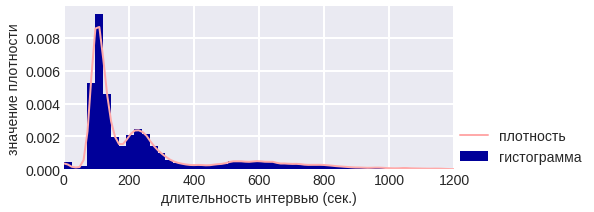

In [6]:
plt.figure(figsize=(7, 3))

name = 'длительность интервью (сек.)'
eps = 0.5
plt.hist(feature_time, bins=50, color='#000099', density=True, label='гистограмма')
plot_density(feature_time, color='#FFAAAA', label='плотность', covariance_factor=0.05)
plt.xlim([np.min(feature_time) - eps, np.max(feature_time) + eps]) # 
plt.xlabel(name)
plt.ylabel('значение плотности')
plt.grid(lw=2)
#plt.plot([120, 120], [0, 0.005], lw=3, c='#CCFFCC')
#plt.text(120 + 5, +0.0045, '2 минуты', color='black')
#plt.plot([600, 600], [0, 0.005], lw=3, c='#CCFFCC')
#plt.text(600 + 5, +0.0045, '10 минут', color='black')
plt.legend(loc=(1, 0));

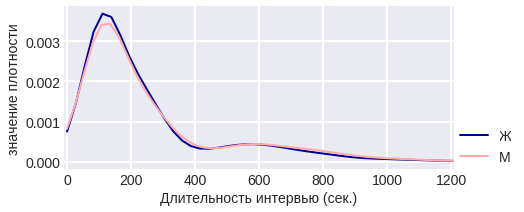

In [8]:
plt.figure(figsize=(7, 3))
name = 'Длительность интервью (сек.)'
eps = 10.5
plot_density(data[data.Q1.values==1].IVDur.values, color='#000099', label='Ж', covariance_factor=0.25)
plot_density(data[data.Q1.values==2].IVDur.values, color='#FFAAAA', label='М', covariance_factor=0.25)

plt.xlim([np.min(feature_time) - eps, np.max(feature_time) + eps])
plt.xlabel(name)
plt.ylabel('значение плотности')
plt.grid(lw=2)
plt.legend(loc=(1, 0))

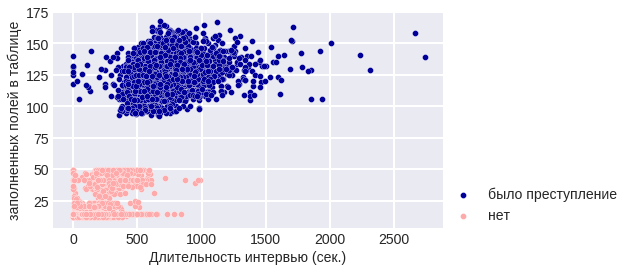

In [9]:
plt.figure(figsize=(7, 4))
feature = data.IVDur[data.Q75 == 1].values
nullsums = (~data[data.Q75 == 1].isnull()).sum(axis=1)
plt.scatter(feature, nullsums, c='#000099', edgecolor='white', lw=0.3, label='было преступление')

feature = data.IVDur[data.Q75 == 2].values
nullsums = (~data[data.Q75 == 2].isnull()).sum(axis=1)
plt.scatter(feature, nullsums, c='#FFAAAA', edgecolor='white', lw=0.3, label='нет')

plt.xlabel('Длительность интервью (сек.)')
plt.ylabel('заполненных полей в таблице')
plt.grid(lw=2)
plt.legend(loc=(1, 0));

## очень продолжительные интервью

In [10]:
feature_time = data.IVDur.values
i = feature_time > 35*60

data_long = data[i]
data_long

,ID,IVDur,Q1,Q2,Q75,Q75_1N,Q76,Q76_1N,Q5_1T,Q66,Q14,Q1414,Q18,Q15,Q16,Q77,Q17,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q19_9,Q19_88,Q19_999,Q67_1,Q67_2,Q67_3,Q67_4,Q67_5,Q67_6,Q67_7,Q67_8,Q67_9,Q67_88,Q67_999,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q20_7,Q20_8,Q20_9,Q20_88,Q20_999,Q21,Q21_1N,Q22,Q23,Q24,Q25_1,Q25_2,Q25_3,Q26_1,Q26_2,Q26_3,Q30,Q27,Q28,Q29,Q31,Q33,Q32,Q34,Q36,Q37,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q38,Q39,Q40,Q41,Q42_1,Q42_2,Q42_3,Q42_999,Q43,Q44,Q45,Q46,Q68,Q47_1,Q47_2,Q47_3,Q47_4,Q47_888,Q47_999,Q49,Q50,Q51,Q52,Q53,Q54,Q78,Q79,Q80,Q80_1N,Q57,Q58,Q69,Q70,Q71,Q72,Q73,Q74_1,Q74_2,Q74_3,Q60,Q61,Q64,Q65,resp_place_is_city,resp_place_population,resp_is_male,resp_age,resp_is_living_alone,resp_is_married,resp_household_size,resp_income,resp_edu,resp_is_enforcers_familiar,resp_is_crime_record,resp_is_russian_citizen,resp_is_crime_victim,resp_sample_group,resp_ses_is_employed,resp_ses_is_student,resp_ses_is_pensioner,resp_ses_is_welfare,resp_ses_is_looked_for_job,resp_ses_job_is_manager,resp_ses_job_is_manual,resp_ses_job_is_freelancer,resp_ses_job_is_private,resp_ses_job_is_public,resp_ses,crime_season,crime_is_remote,crime_is_property_damage,crime_is_violent_damage,crime_is_seeking_medical_help,crime_is_property_acquisition,crime_is_fraud,crime_is_offender_seen,crime_is_threat,crime_type,crime_place,crime_place_grouped,crime_place_remote,crime_place_is_home,crime_is_people_around,crime_is_daytime,victim_is_reporting,victim_is_self_accuse,victim_damage_physical,victim_damage_rub,victim_damage_rub_ln,victim_is_crime_case_initiated,victim_is_repeat_contact_with_police,victim_police_reaction_time,victim_police_number_of_contacts,victim_who_contacted_police,victim_way_to_contact_police,victim_is_offender_found,victim_who_found_offender,victim_is_offender_punished,victim_is_went_to_court,victim_compensation,victim_is_compensated,victim_is_reconciliation,victim_is_told_anyone,offender_is_male,offender_is_on_duty,offender_is_alone,offender_is_familiar,offender_is_drug_intoxicated,offender_relationship,offender_relationship_grouped
3772,13368942,2234,1,28,1,1.0,2.0,NaN,попытка изнасилования - выбросили с 4 Этажа,2.0,6.0,NaN,1.0,2.0,11.0,NaN,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,3000.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,2.0,2.0,2.0,NaN,NaN,5.0,1.0,NaN,1.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,2.0,NaN,NaN,NaN,5.0,2.0,2.0,3.0,2.0,3.0,3.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,2.0,1.0,564443.0,0,28,0.0,0.0,3.0,3.0,2.0,0.0,0.0,1.0,1,1,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,6.0,1.0,NaN,1.0,1.0,0.0,1.0,0.0,3.0,3000.0,3.477121,0.0,0.0,NaN,3.0,5.0,NaN,0.0,NaN,NaN,NaN,5.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,8.0,6.0
3978,13376637,2314,2,80,1,1.0,2.0,NaN,"большая сумма денег была, решили изъять, вмеш...",2.0,4.0,NaN,1.0,1.0,7.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,2.0,2.0,1.0,4.0,2.0,5.0,3.0,1.0,1.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,4.0,2.0,1.0,3.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,1.0,2.0,1.0,4973.0,1,80,1.0,0.0,NaN,NaN,3.0,0.0,0.0,1.0,1,1,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,4.0,2.0,NaN,0.0,1.0,1.0,1.0,1.0,2.0,0.0,0.000000,1.0,0.0,NaN,4.0,5.0,NaN,1.0,1.0,1.0,1.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,5.0,3.0
4277,13406546,2742,1,79,1,300.0,1.0,300.0,Вытаскал к себе трубы (стека стояла). Которые ...,2.0,7.0,NaN,2.0,2.0,3.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,600.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [11]:
for t, s in zip(data_long.ID, data_long.Q5_1T):
    print (t, s)

13368942  попытка изнасилования - выбросили с 4 Этажа
13376637  большая сумма денег была, решили изъять, вмешалось ФСБ, одному дали 18 другому 12 особого
13406546 Вытаскал к себе трубы (стека стояла). Которые я покупала сама. 
14283011 клевета,оскорбление связано с вымогательством и захватом участка 


## очень короткие интервью

In [12]:
i = (data.IVDur <= 1) & (data.Q75 == 1)

data_short = data[i]
data_short

,ID,IVDur,Q1,Q2,Q75,Q75_1N,Q76,Q76_1N,Q5_1T,Q66,Q14,Q1414,Q18,Q15,Q16,Q77,Q17,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q19_9,Q19_88,Q19_999,Q67_1,Q67_2,Q67_3,Q67_4,Q67_5,Q67_6,Q67_7,Q67_8,Q67_9,Q67_88,Q67_999,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q20_7,Q20_8,Q20_9,Q20_88,Q20_999,Q21,Q21_1N,Q22,Q23,Q24,Q25_1,Q25_2,Q25_3,Q26_1,Q26_2,Q26_3,Q30,Q27,Q28,Q29,Q31,Q33,Q32,Q34,Q36,Q37,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q38,Q39,Q40,Q41,Q42_1,Q42_2,Q42_3,Q42_999,Q43,Q44,Q45,Q46,Q68,Q47_1,Q47_2,Q47_3,Q47_4,Q47_888,Q47_999,Q49,Q50,Q51,Q52,Q53,Q54,Q78,Q79,Q80,Q80_1N,Q57,Q58,Q69,Q70,Q71,Q72,Q73,Q74_1,Q74_2,Q74_3,Q60,Q61,Q64,Q65,resp_place_is_city,resp_place_population,resp_is_male,resp_age,resp_is_living_alone,resp_is_married,resp_household_size,resp_income,resp_edu,resp_is_enforcers_familiar,resp_is_crime_record,resp_is_russian_citizen,resp_is_crime_victim,resp_sample_group,resp_ses_is_employed,resp_ses_is_student,resp_ses_is_pensioner,resp_ses_is_welfare,resp_ses_is_looked_for_job,resp_ses_job_is_manager,resp_ses_job_is_manual,resp_ses_job_is_freelancer,resp_ses_job_is_private,resp_ses_job_is_public,resp_ses,crime_season,crime_is_remote,crime_is_property_damage,crime_is_violent_damage,crime_is_seeking_medical_help,crime_is_property_acquisition,crime_is_fraud,crime_is_offender_seen,crime_is_threat,crime_type,crime_place,crime_place_grouped,crime_place_remote,crime_place_is_home,crime_is_people_around,crime_is_daytime,victim_is_reporting,victim_is_self_accuse,victim_damage_physical,victim_damage_rub,victim_damage_rub_ln,victim_is_crime_case_initiated,victim_is_repeat_contact_with_police,victim_police_reaction_time,victim_police_number_of_contacts,victim_who_contacted_police,victim_way_to_contact_police,victim_is_offender_found,victim_who_found_offender,victim_is_offender_punished,victim_is_went_to_court,victim_compensation,victim_is_compensated,victim_is_reconciliation,victim_is_told_anyone,offender_is_male,offender_is_on_duty,offender_is_alone,offender_is_familiar,offender_is_drug_intoxicated,offender_relationship,offender_relationship_grouped
314,13265395,1,1,45,1,3.0,1.0,3.0,заказали товар пришло не качественный. пыталис...,2.0,1.0,NaN,1.0,2.0,2.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3000.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,NaN,NaN,4.0,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,2.0,NaN,NaN,NaN,4.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,2.0,2.0,0.0,0.0,1.0,1.0,3.0,2.0,2.0,1.0,351488.0,0,45,0.0,1.0,2.0,2.0,3.0,1.0,0.0,1.0,1,1,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,5.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,5.0,1.0,1.0,NaN,1.0,1.0,0.0,0.0,1.0,NaN,3000.0,3.477121,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4.0,0.0,NaN,1.0,0.0,1.0,1.0,0.0,0.0,8.0,6.0
2148,13303505,0,1,27,1,1.0,2.0,NaN,кража кошелька из сумке при посадке на автобус,2.0,4.0,NaN,1.0,1.0,3.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3500.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,4.0,1.0,2.0,1.0,2.0,3.0,4.0,1.0,2.0,2.0,NaN,2.0,1.0,0.0,1.0,0.0,1.0,3.0,2.0,2.0,1.0,12506468.0,0,27,0.0,1.0,3.0,4.0,3.0,1.0,0.0,1.0,1,1,1.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,1.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,NaN,0.0,1.0,1.0,0.0,1.0,NaN,3500.0,3.544068,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,13378559,1,1,61,1,1.0,2.0,NaN,"дали цыплят, половина подохли. Сказала, что б...",1.0,NaN,4.0,2.0,1.0,8.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [13]:
for t, s in zip(data_short.ID, data_short.Q5_1T):
    print (t, s)

13265395 заказали товар пришло не качественный. пытались связаться по телефону и смс не отвечали. месяц назад 
13303505  кража кошелька из сумке при посадке на автобус
13378559  дали цыплят, половина подохли. Сказала, что буду платить только живых, угрожали, что спалят хату
13928814 угрозы 
14163079  не выдали зарплату весной 2017 года
14301670 Избиение 


# анализ возраста и пола

In [14]:
feature_sex = data.Q1.values
feature_age = data.Q2.values
df = pd.crosstab(feature_sex, feature_age)
df.index = ['Ж', 'М']
df

col_0,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,90,93,94,96,98
Ж,120,90,101,129,139,113,145,175,162,188,187,203,325,195,231,191,195,234,174,175,197,181,258,134,145,143,117,166,129,165,147,119,247,133,151,137,153,156,168,185,187,192,245,133,177,138,121,143,135,132,126,117,162,78,73,31,21,34,56,41,35,50,65,28,27,8,1,13,6,6,3,4,0,1,2,0
М,143,130,130,116,136,128,138,196,168,196,213,224,353,205,203,199,190,221,160,198,171,171,241,130,160,153,140,142,118,123,134,127,154,83,105,108,134,118,87,94,99,119,140,62,96,70,74,72,69,47,51,51,49,24,21,10,4,12,17,16,7,12,22,11,7,5,5,2,2,2,3,1,1,0,0,1


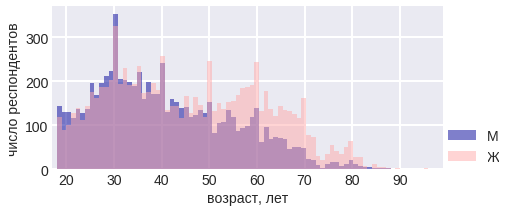

In [16]:
plt.figure(figsize=(7, 3))
name = 'возраст, лет'
eps = 10.5

#plot_density(data[data.Q1.values==1].Q2.values, color='#FFAAAA', label='Ж', covariance_factor=0.25)
plt.hist(data[data.Q1.values==2].Q2.values, bins=81, color='#000099', density=False, alpha=0.5, label='М')
#plot_density(data[data.Q1.values==2].Q2.values, color='#000099', label='М', covariance_factor=0.25)
plt.hist(data[data.Q1.values==1].Q2.values, bins=79, color='#FFAAAA', density=False, alpha=0.5, label='Ж')

plt.xlim([17, 99])
plt.xlabel(name)
plt.ylabel('число респондентов')
plt.grid(lw=2)
plt.legend(loc=(1, 0));

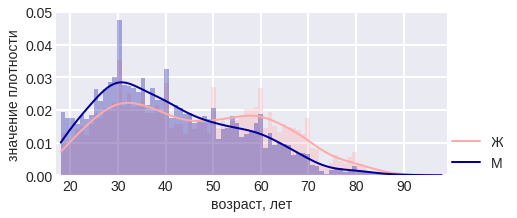

In [17]:
plt.figure(figsize=(7, 3))
name = 'возраст, лет'
eps = 10.5
plt.hist(data[data.Q1.values==1].Q2.values, bins=79, color='#FFAAAA', density=True, alpha=0.3)
plot_density(data[data.Q1.values==1].Q2.values, color='#FFAAAA', label='Ж', covariance_factor=0.25)
plt.hist(data[data.Q1.values==2].Q2.values, bins=81, color='#000099', density=True, alpha=0.3)
plot_density(data[data.Q1.values==2].Q2.values, color='#000099', label='М', covariance_factor=0.25)


plt.xlim([17, 99])
plt.xlabel(name)
plt.ylabel('значение плотности')
plt.grid(lw=2)
plt.legend(loc=(1, 0));

# ответ на вопрос о происшествии

*Вспомните, пожалуйста, было ли такое, что вас обокрали, вас побили, вам угрожали, вы стали жертвой насилия, мошенничества или других преступлений в России за последние 5 лет?*

In [35]:
dict_short = {1: 'Да', 2: 'Нет', 3: 'Затрудняюсь ответить / не помню'}
dict_short2 = {1: 'Да', 2: 'Нет', 3: 'Затрудняюсь ответить/\nне помню'}

#feature_incident = data.Q75.values
#data.Q75.map(dict_short).value_counts()

show_tab(data, 'Q75', dct=dict_short)

,ответов,процентов
Нет,13776,81.9%
Да,3001,17.8%
Затрудняюсь ответить / не помню,41,0.2%


In [20]:
feature_sex = data.Q1.values
feature_age = data.Q2.values
feature_incident = data.Q75.values
df = pd.crosstab(feature_sex, feature_incident)
df.index = ['Ж', 'М']
df.columns = dict_short.values()

cross_plus_percent(df)

,Да,Нет,Затрудняюсь ответить / не помню
Ж,1618 (9.6%),7663 (45.6%),13 (0.1%)
М,1383 (8.2%),6113 (36.3%),28 (0.2%)


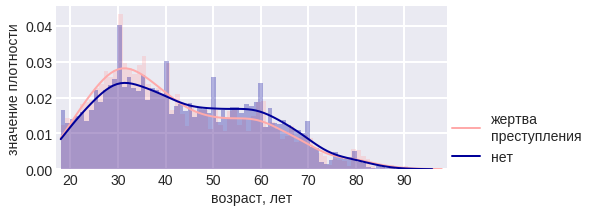

In [21]:
plt.figure(figsize=(7, 3))
name = 'возраст, лет'
eps = 10.5
plt.hist(data[data.Q75.values==1].Q2.values, bins=80, color='#FFAAAA', density=True, alpha=0.3)
plot_density(data[data.Q75.values==1].Q2.values, color='#FFAAAA', label='жертва\nпреступления', covariance_factor=0.25)
plt.hist(data[data.Q75.values==2].Q2.values, bins=79, color='#000099', density=True, alpha=0.3)
plot_density(data[data.Q75.values==2].Q2.values, color='#000099', label='нет', covariance_factor=0.25)


plt.xlim([17, 99])
plt.xlabel(name)
plt.ylabel('значение плотности')
plt.grid(lw=2)
plt.legend(loc=(1, 0));

## сколько случаев произошло

тут явно некорректная информация, поскольку присутствуют большие значения

In [22]:
print ('как отвечали люди на то, сколько случаев')
data.Q75_1N.unique().astype(int)

как отвечали люди на то, сколько случаев


array([                   2,                    4,                    1,
                          3,                   10,                    7,
                         20, -9223372036854775808,                 2013,
                        100,                    9,                   45,
                          6,                   27,                    5,
                         30,                   15,                    0,
                          8,                   50,                   18,
                       1000,                   25,                  300,
                       3000,                   70,                   12,
                        360,                   60,                   62,
                         14,                   35,                   11,
                        200,                   13,                 1830,
                         37,                   65,                  365])

всё, что больше 6 я превратил в 6

In [23]:
data.Q75_1N = np.maximum(data.Q75_1N.values, 1)
data.Q75_1N = np.minimum(data.Q75_1N.values, 6)
data.Q75_1N = data.Q75_1N.astype(int, errors='ignore')

data.Q76_1N = np.maximum(data.Q76_1N.values, 1)
data.Q76_1N = np.minimum(data.Q76_1N.values, 6)
data.Q76_1N = data.Q76_1N.astype(int, errors='ignore')

/home/dash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in maximum
  """Entry point for launching an IPython kernel.
/home/dash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in minimum
  
/home/dash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in maximum
  """
/home/dash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in minimum
  


In [24]:
df = show_tab(data, 'Q75_1N')
df = df.sort_index()
df.index = df.index.map({1.0: '1', 2.:'2', 3.: '3', 4.:'4', 5.:'5', 6.: '> 5'})
df

,ответов,процентов
1,1606,53.5%
2,658,21.9%
3,311,10.4%
4,90,3.0%
5,120,4.0%
> 5,216,7.2%


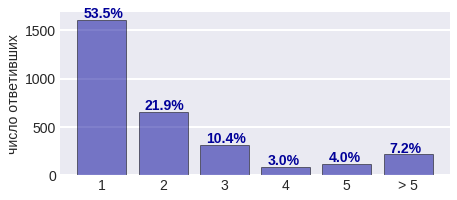

In [25]:
show_bar(df['ответов'], eps_x=-0.3, eps_y=20, alpha=0.5, edgecolor='black')

In [26]:
print ('Сколько всего подобных случаев произошло с Вами за последние 5 лет?')
print (' А за последние 12 месяцев  такие случаи бывали?')
feature_number = data.Q75_1N.values
feature_lastyear = data.Q76.values
df = pd.crosstab(feature_lastyear, feature_number)
df.index = ['Да', 'Нет', 'Затрудняюсь ответить / не помню ']
df.columns = ['1', '2',  '3',  '4',  '5',  '> 5']

cross_plus_percent(df)

Сколько всего подобных случаев произошло с Вами за последние 5 лет?
 А за последние 12 месяцев  такие случаи бывали?


,1,2,3,4,5,> 5
Да,481 (16.0%),294 (9.8%),185 (6.2%),54 (1.8%),91 (3.0%),183 (6.1%)
Нет,1121 (37.4%),362 (12.1%),125 (4.2%),33 (1.1%),27 (0.9%),31 (1.0%)
Затрудняюсь ответить / не помню,4 (0.1%),2 (0.1%),1 (0.0%),3 (0.1%),2 (0.1%),2 (0.1%)


In [27]:
feature_number = data.Q75_1N.values
feature_lastyear = data.Q76_1N.values
df = pd.crosstab(feature_lastyear, feature_number)
df.index = ['1', '2',  '3',  '4',  '5',  '> 5']
df.columns = ['1', '2',  '3',  '4',  '5',  '> 5']
cross_plus_percent(df)

,1,2,3,4,5,> 5
1,466 (36.2%),207 (16.1%),121 (9.4%),18 (1.4%),32 (2.5%),30 (2.3%)
2,5 (0.4%),77 (6.0%),37 (2.9%),23 (1.8%),36 (2.8%),30 (2.3%)
3,6 (0.5%),6 (0.5%),20 (1.6%),3 (0.2%),15 (1.2%),37 (2.9%)
4,0 (0.0%),0 (0.0%),1 (0.1%),9 (0.7%),1 (0.1%),17 (1.3%)
5,1 (0.1%),0 (0.0%),6 (0.5%),0 (0.0%),6 (0.5%),22 (1.7%)
> 5,3 (0.2%),4 (0.3%),0 (0.0%),1 (0.1%),1 (0.1%),47 (3.6%)


# где произошло (не через телефон/интернет)

In [28]:
dictQ14 = {1: 'Квартира или дом',
       2: 'На работе или на учёбе (школа, университет, детский сад, техникум)',
       3: 'В подъезде или во дворе',
       4: 'На улице, дороге, парковке',
       5: 'Общественные здания (магазины, кафе, банки, поликлиники)',
       6: 'Дом или квартира знакомых или родственников',
       7: 'Дача',
       8: 'На транспорте (в такси, на вокзале, в поезде, самолёте)',
       9: 'В закрытом учреждении (армия, больница, ИК и т.д.)',
       10: 'В автомобиле',
       11: 'Другое',
       12: 'На природе, в лесу или парке',
       13: 'Невозможно сказать (напр., украли деньги с банковской карты)',
       14: 'Затрудняюсь ответить / не помню'}

In [29]:
show_tab(data, 'Q14', dct=dictQ14)

,ответов,процентов
Квартира или дом,501,23.9%
"На улице, дороге, парковке",475,22.6%
"Общественные здания (магазины, кафе, банки, поликлиники)",340,16.2%
В подъезде или во дворе,167,8.0%
"На работе или на учёбе (школа, университет, детский сад, техникум)",153,7.3%
"На транспорте (в такси, на вокзале, в поезде, самолёте)",127,6.1%
Дача,85,4.1%
"Невозможно сказать (напр., украли деньги с банковской карты)",66,3.1%
Дом или квартира знакомых или родственников,59,2.8%
Затрудняюсь ответить / не помню,35,1.7%


Text(0.5,0,'ответивших')

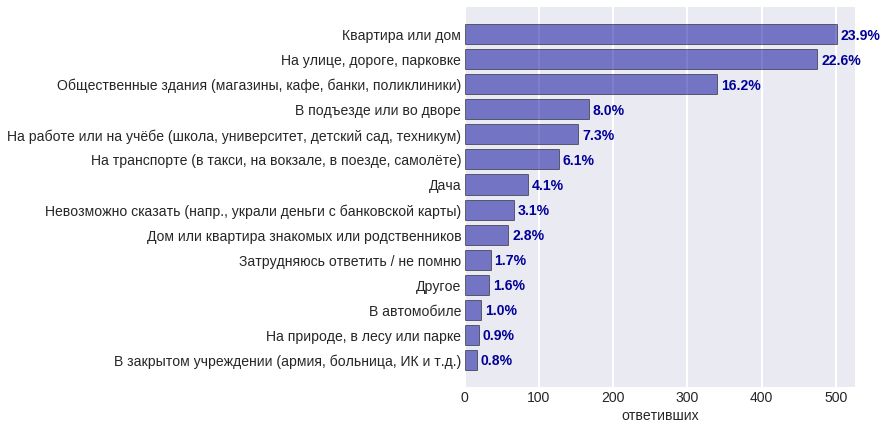

In [30]:
d = data.Q14.map(dictQ14).value_counts()
show_barh(d, figsize=(7,7), eps_x=5, eps_y=-0.2, alpha=0.5, edgecolor='black', reverse=True)
plt.xlabel('ответивших')

In [32]:
dct = {'Квартира или дом': 'дом',
       'На работе или на учёбе (школа, университет, детский сад, техникум)': 'работа/учёба',
       'В подъезде или во дворе': 'дорога',
       'На улице, дороге, парковке': 'дорога',
       'Общественные здания (магазины, кафе, банки, поликлиники)': 'здания',
       'Дом или квартира знакомых или родственников': 'гости',
       'Дача': 'дом',
       'На транспорте (в такси, на вокзале, в поезде, самолёте)': 'транспорт',
       'В закрытом учреждении (армия, больница, ИК и т.д.)': 'здания',
       'В автомобиле': 'транспорт',
       'Другое': 'другое',
       'На природе, в лесу или парке': 'дорога',
       'Невозможно сказать (напр., украли деньги с банковской карты)': 'другое',
       'Затрудняюсь ответить / не помню': 'не помню'}
d = data.Q14.map(dictQ14).map(dct).value_counts()
d

дорога          661
дом             586
здания          356
работа/учёба    153
транспорт       149
другое           99
гости            59
не помню         35
Name: Q14, dtype: int64

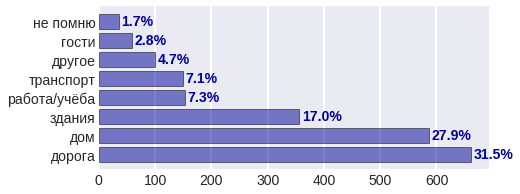

In [118]:
show_barh(d, figsize=(7,3), eps_x=5, eps_y=-0.2, alpha=0.5, edgecolor='black')

# где произошло (через телефон/интернет)

In [33]:
dictQ66 = {1: 'Да, через телефон или интернет',
           2: 'Нет, не через телефон или интернет',
           3: 'Затрудняюсь ответить'}

data.Q66.map(dictQ66).value_counts()

show_tab(data, 'Q66', dct = dictQ66)

,ответов,процентов
"Нет, не через телефон или интернет",2075,69.1%
"Да, через телефон или интернет",903,30.1%
Затрудняюсь ответить,23,0.8%


Text(0.5,0,'ответивших')

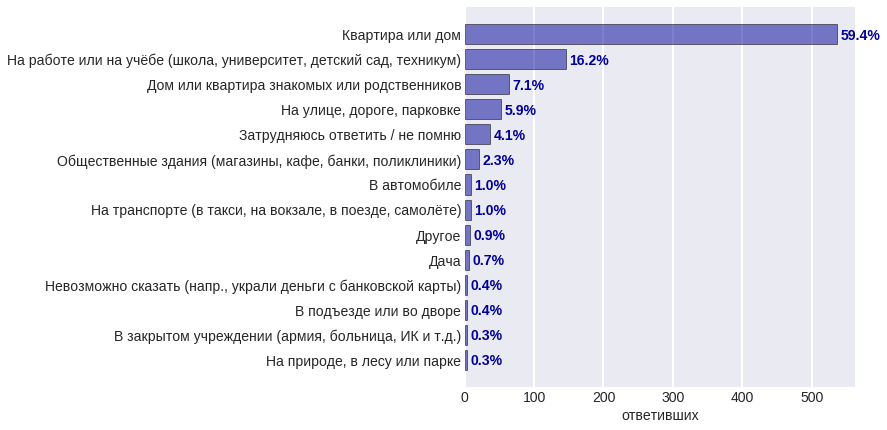

In [98]:
d = data.Q1414.map(dictQ14).value_counts()
show_barh(d, figsize=(7,7), eps_x=5, eps_y=-0.2, alpha=0.5, edgecolor='black', reverse=True)
plt.xlabel('ответивших')

# когда было

можно заметить, что вопрос про время года задавался только если не отвечали точно месяц

In [6]:
months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
          'Июль', 'Август', 'Сентябрь',  'Октябрь', 'Ноябрь', 'Декабрь',
         'не помню']
seasons = ['Зима', 'Весна', 'Лето', 'Осень', 'не помню']

dict_month = dict(zip(range(1, 14), months))
dict_seasons = dict(zip(range(1, 6), seasons))

In [7]:
show_tab(data, 'Q16', dct=dict_month)

,ответов,процентов
не помню,621,20.7%
Март,325,10.8%
Апрель,268,8.9%
Февраль,237,7.9%
Декабрь,222,7.4%
Январь,207,6.9%
Август,193,6.4%
Октябрь,191,6.4%
Сентябрь,168,5.6%
Ноябрь,159,5.3%


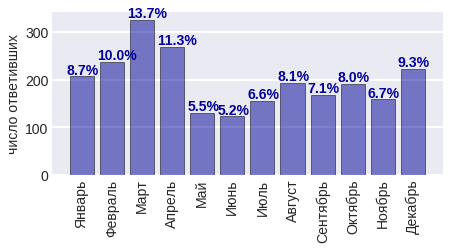

In [8]:
d = data.Q16.value_counts().sort_index()
d.index = months

show_bar(d.head(12), rotation=90, eps_x=-0.5, eps_y=5, alpha=0.5, edgecolor='black')

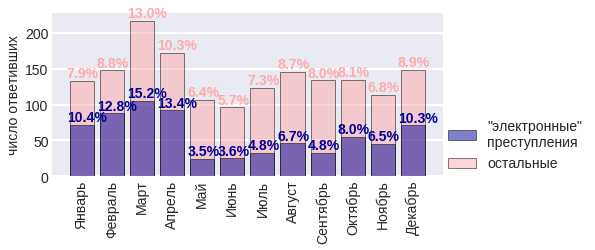

In [9]:
d = data[data.Q66==2].Q16.value_counts().sort_index()
d.index = months
show_bar(d.head(12), rotation=90, eps_x=-0.5, eps_y=5, alpha=0.5,
         edgecolor='black', color='#FFAAAA')

# электронные преступления
d = data[data.Q66==1].Q16.value_counts().sort_index()
d.index = months
show_bar(d.head(12), rotation=90, eps_x=-0.5, eps_y=5, alpha=0.5,
         edgecolor='black', new_figure=False)

plt.bar([0],[0],alpha=0.5, edgecolor='black', color='#000099', label='"электронные"\nпреступления')
plt.bar([0],[0],alpha=0.5, edgecolor='black', color='#FFAAAA', label='остальные')
plt.legend(loc=(1,0));

In [13]:
d2 = data.Q77.value_counts().sort_index()
d2.index = seasons
d2

show_tab(data, 'Q77', dct = dict_seasons)

,ответов,процентов
Весна,136,22.6%
Лето,134,22.3%
Осень,134,22.3%
Зима,117,19.4%
не помню,81,13.5%


In [15]:
d = data.Q16.value_counts().sort_index()
d.index = months

knows = [d['Январь'] + d['Февраль'] + d['Декабрь'],
         d['Март'] + d['Апрель'] + d['Май'],
         d['Июнь'] + d['Июль'] + d['Август'],
         d['Сентябрь'] + d['Октябрь'] + d['Ноябрь']]
knows 

[666, 724, 472, 518]

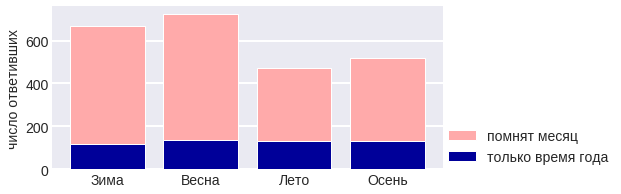

In [16]:
plt.figure(figsize=(7, 3))
d2 = d2.head(4)
plt.bar(np.arange(len(d2)), knows, color='#FFAAAA', edgecolor='white', label='помнят месяц')
plt.bar(np.arange(len(d2)), d2.values, color='#000099', edgecolor='white', label='только время года')
plt.xticks(np.arange(len(d2)), d2.index, rotation=0);
plt.grid(lw=2, axis='y')
plt.ylabel('число ответивших')
plt.legend(loc=(1,0))

# материальный ущерб

In [17]:
dictQ19 = {'Q19_1':  'Деньги наличные',
           'Q19_2':  'Деньги с карты, счета и т.п.',
           'Q19_3':  'Банковские карты и т.п.',
           'Q19_4':  'Документы (паспорт)',
           'Q19_5':  'Техника (телефон, ноутбук, пылесос, ...)',
           'Q19_6':  'Драгоценности и украшения',
           'Q19_7':  'Транспортное средство (в тч угон и запчасти)',
           'Q19_8':  'Недвижимость (и составляющие — окна, двери, ...)',
           'Q19_9':  'Одежда',
           'Q19_88':  'Нет',
           'Q19_999':  'Затрудняюсь ответить / не помню'}

In [19]:
l = []
n = []
for name in dictQ19:
    l.append((data[name]==1.).sum())
    n.append(dictQ19[name])
    print ('{} / {}'.format((data[name]==1.).sum(), (data[name]==0.).sum()), dictQ19[name])
    
d = pd.Series(l, index = n)
# d = d[(d > 20) & (d < 900)]
d.sort_values(inplace=True)

941 / 2060 Деньги наличные
376 / 2625 Деньги с карты, счета и т.п.
107 / 2894 Банковские карты и т.п.
92 / 2909 Документы (паспорт)
482 / 2519 Техника (телефон, ноутбук, пылесос, ...)
114 / 2887 Драгоценности и украшения
164 / 2837 Транспортное средство (в тч угон и запчасти)
115 / 2886 Недвижимость (и составляющие — окна, двери, ...)
144 / 2761 Одежда
934 / 2067 Нет
20 / 2981 Затрудняюсь ответить / не помню


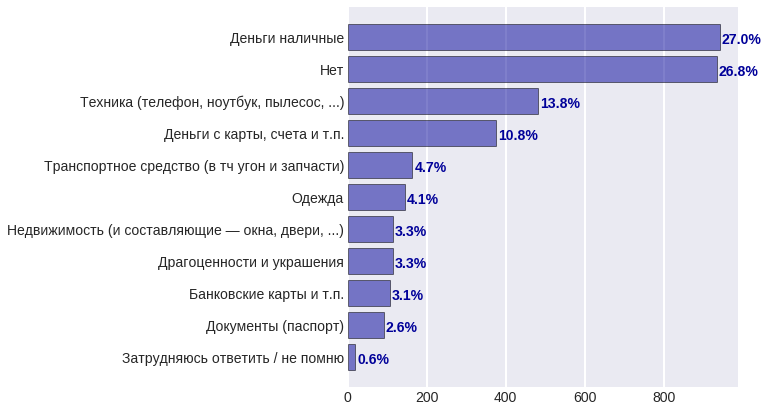

In [20]:
show_barh(d, figsize=(7,7), eps_x=5, eps_y=-0.2, alpha=0.5, edgecolor='black')

# завладел имуществом

In [21]:
dictQ67 = dictQ19.copy()
for name in dictQ67:
    dictQ67['Q67' + name[3:]] = dictQ67.pop(name)
dictQ67

{'Q67_1': 'Деньги наличные',
 'Q67_2': 'Деньги с карты, счета и т.п.',
 'Q67_3': 'Банковские карты и т.п.',
 'Q67_4': 'Документы (паспорт)',
 'Q67_5': 'Техника (телефон, ноутбук, пылесос, ...)',
 'Q67_6': 'Драгоценности и украшения',
 'Q67_7': 'Транспортное средство (в тч угон и запчасти)',
 'Q67_8': 'Недвижимость (и составляющие — окна, двери, ...)',
 'Q67_9': 'Одежда',
 'Q67_88': 'Нет',
 'Q67_999': 'Затрудняюсь ответить / не помню'}

In [22]:
l = []
n = []
for name in dictQ67:
    l.append((data[name]==1.).sum())
    n.append(dictQ67[name])
    print ('{} / {}'.format((data[name]==1.).sum(), (data[name]==0.).sum()), dictQ67[name])
    
d = pd.Series(l, index = n)
# d = d[(d > 20) & (d < 900)]
d.sort_values(inplace=True)

818 / 1229 Деньги наличные
344 / 1703 Деньги с карты, счета и т.п.
61 / 1986 Банковские карты и т.п.
52 / 1995 Документы (паспорт)
449 / 1598 Техника (телефон, ноутбук, пылесос, ...)
85 / 1962 Драгоценности и украшения
102 / 1945 Транспортное средство (в тч угон и запчасти)
50 / 1997 Недвижимость (и составляющие — окна, двери, ...)
98 / 1888 Одежда
293 / 1754 Нет
0 / 2047 Затрудняюсь ответить / не помню


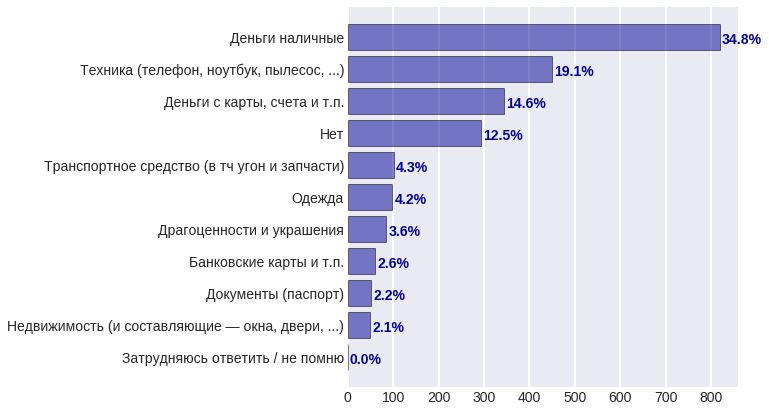

In [23]:
show_barh(d, figsize=(7,7), eps_x=5, eps_y=-0.2, alpha=0.5, edgecolor='black')

# имущество уничтожено / повреждено

In [24]:
dictQ20 = dictQ19.copy()
for name in dictQ20:
    dictQ20['Q20' + name[3:]] = dictQ20.pop(name)
dictQ20

{'Q20_1': 'Деньги наличные',
 'Q20_2': 'Деньги с карты, счета и т.п.',
 'Q20_3': 'Банковские карты и т.п.',
 'Q20_4': 'Документы (паспорт)',
 'Q20_5': 'Техника (телефон, ноутбук, пылесос, ...)',
 'Q20_6': 'Драгоценности и украшения',
 'Q20_7': 'Транспортное средство (в тч угон и запчасти)',
 'Q20_8': 'Недвижимость (и составляющие — окна, двери, ...)',
 'Q20_9': 'Одежда',
 'Q20_88': 'Нет',
 'Q20_999': 'Затрудняюсь ответить / не помню'}

In [25]:
l = []
n = []
for name in dictQ20:
    l.append((data[name]==1.).sum())
    n.append(dictQ20[name])
    print ('{} / {}'.format((data[name]==1.).sum(), (data[name]==0.).sum()), dictQ20[name])
    
d = pd.Series(l, index = n)
# d = d[(d > 20) & (d < 900)]
d.sort_values(inplace=True)

4 / 0 Деньги наличные
2 / 0 Деньги с карты, счета и т.п.
7 / 0 Банковские карты и т.п.
5 / 0 Документы (паспорт)
6 / 0 Техника (телефон, ноутбук, пылесос, ...)
2 / 0 Драгоценности и украшения
6 / 0 Транспортное средство (в тч угон и запчасти)
6 / 0 Недвижимость (и составляющие — окна, двери, ...)
6 / 0 Одежда
0 / 0 Нет
0 / 0 Затрудняюсь ответить / не помню


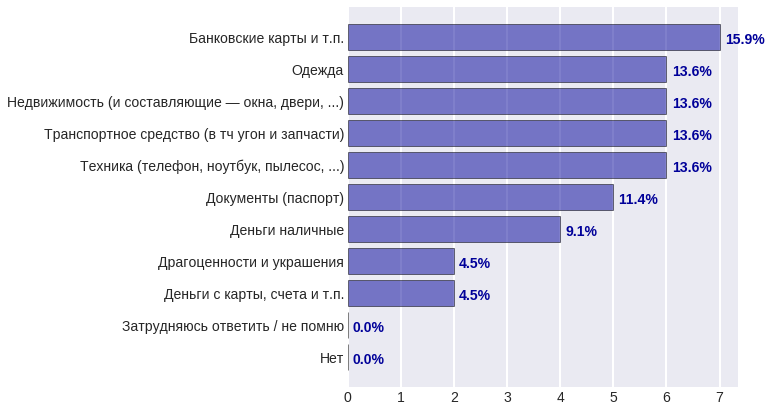

In [26]:
show_barh(d, figsize=(7,7), eps_x=0.1, eps_y=-0.2, alpha=0.5, edgecolor='black')

# сумма материального ущерба

In [27]:
df = data[data.Q21==2].Q21_1N.value_counts().head(10)
pd.DataFrame({'сумма': df.index, 'упоминаний': df.values}).astype(int)

,сумма,упоминаний
0,10000,148
1,5000,139
2,20000,103
3,30000,96
4,15000,88
5,3000,77
6,50000,66
7,1000,61
8,2000,48
9,8000,47


In [28]:
money = data[data.Q21==2].Q21_1N.values

print('максимальная сумма ущерба: {}'.format(np.max(money)))
print('случаев, когда ущерб больше 500 тыс. руб.: {}'.format(np.sum(money > 500000)))
money = money[money <= 500000]

максимальная сумма ущерба: 6000000000.0
случаев, когда ущерб больше 500 тыс. руб.: 76


In [29]:
# у кого же самое большое преступление
data[data.Q21_1N >= 6000000000]

,ID,IVDur,Q1,Q2,Q75,Q75_1N,Q76,Q76_1N,Q5_1T,Q66,Q14,Q1414,Q18,Q15,Q16,Q77,Q17,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q19_9,Q19_88,Q19_999,Q67_1,Q67_2,Q67_3,Q67_4,Q67_5,Q67_6,Q67_7,Q67_8,Q67_9,Q67_88,Q67_999,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q20_7,Q20_8,Q20_9,Q20_88,Q20_999,Q21,Q21_1N,Q22,Q23,Q24,Q25_1,Q25_2,Q25_3,Q26_1,Q26_2,Q26_3,Q30,Q27,Q28,Q29,Q31,Q33,Q32,Q34,Q36,Q37,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q38,Q39,Q40,Q41,Q42_1,Q42_2,Q42_3,Q42_999,Q43,Q44,Q45,Q46,Q68,Q47_1,Q47_2,Q47_3,Q47_4,Q47_888,Q47_999,Q49,Q50,Q51,Q52,Q53,Q54,Q78,Q79,Q80,Q80_1N,Q57,Q58,Q69,Q70,Q71,Q72,Q73,Q74_1,Q74_2,Q74_3,Q60,Q61,Q64,Q65,resp_place_is_city,resp_place_population,resp_is_male,resp_age,resp_is_living_alone,resp_is_married,resp_household_size,resp_income,resp_edu,resp_is_enforcers_familiar,resp_is_crime_record,resp_is_russian_citizen,resp_is_crime_victim,resp_sample_group,resp_ses_is_employed,resp_ses_is_student,resp_ses_is_pensioner,resp_ses_is_welfare,resp_ses_is_looked_for_job,resp_ses_job_is_manager,resp_ses_job_is_manual,resp_ses_job_is_freelancer,resp_ses_job_is_private,resp_ses_job_is_public,resp_ses,crime_season,crime_is_remote,crime_is_property_damage,crime_is_violent_damage,crime_is_seeking_medical_help,crime_is_property_acquisition,crime_is_fraud,crime_is_offender_seen,crime_is_threat,crime_type,crime_place,crime_place_grouped,crime_place_remote,crime_place_is_home,crime_is_people_around,crime_is_daytime,victim_is_reporting,victim_is_self_accuse,victim_damage_physical,victim_damage_rub,victim_damage_rub_ln,victim_is_crime_case_initiated,victim_is_repeat_contact_with_police,victim_police_reaction_time,victim_police_number_of_contacts,victim_who_contacted_police,victim_way_to_contact_police,victim_is_offender_found,victim_who_found_offender,victim_is_offender_punished,victim_is_went_to_court,victim_compensation,victim_is_compensated,victim_is_reconciliation,victim_is_told_anyone,offender_is_male,offender_is_on_duty,offender_is_alone,offender_is_familiar,offender_is_drug_intoxicated,offender_relationship,offender_relationship_grouped
14157,14749566,529,1,62,1,1.0,2.0,NaN,мошенничество,1.0,NaN,1.0,2.0,2.0,11.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.000000e+09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,6.0,2.0,5.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,3.0,2.0,1.0,3.0,NaN,NaN,3.0,1.0,2.0,1.0,NaN,2.0,2.0,0.0,0.0,1.0,1.0,3.0,1.0,2.0,1.0,12506468.0,0,62,1.0,0.0,NaN,3.0,3.0,0.0,0.0,1.0,1,1,1.0,0.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,1.0,2.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,6.0,13.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,6.000000e+09,9.778151,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3.0,0.0,NaN,0.0,1.0,0.0,1.0,1.0,0.0,3.0,2.0


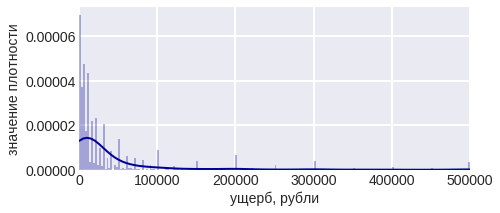

In [30]:
plt.figure(figsize=(7, 3))
name = 'ущерб, рубли'
eps = 10.5
#plt.hist(data[data.Q1.values==1].Q2.values, bins=79, color='#FFAAAA', density=True, alpha=0.3)
#plot_density(data[data.Q1.values==1].Q2.values, color='#FFAAAA', label='Ж', covariance_factor=0.25)
plt.hist(money, bins=200, color='#000099', density=True, alpha=0.3)
plot_density(money, color='#000099', covariance_factor=0.25)


plt.xlim([0, 500000])
plt.xlabel(name)
plt.ylabel('значение плотности')
plt.grid(lw=2)
#plt.legend(loc=(1, 0))

In [31]:
# электронные преступления
np.median(data[(data.Q21==2)&(data.Q66==1)].Q21_1N.values)

5600.0

In [32]:
# обычные
np.median(data[(data.Q21==2)&(data.Q66==2)].Q21_1N.values)

15000.0

In [33]:
data[(data.Q66==1)&(data.Q19_88==1)].head()

,ID,IVDur,Q1,Q2,Q75,Q75_1N,Q76,Q76_1N,Q5_1T,Q66,Q14,Q1414,Q18,Q15,Q16,Q77,Q17,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q19_9,Q19_88,Q19_999,Q67_1,Q67_2,Q67_3,Q67_4,Q67_5,Q67_6,Q67_7,Q67_8,Q67_9,Q67_88,Q67_999,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q20_7,Q20_8,Q20_9,Q20_88,Q20_999,Q21,Q21_1N,Q22,Q23,Q24,Q25_1,Q25_2,Q25_3,Q26_1,Q26_2,Q26_3,Q30,Q27,Q28,Q29,Q31,Q33,Q32,Q34,Q36,Q37,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q38,Q39,Q40,Q41,Q42_1,Q42_2,Q42_3,Q42_999,Q43,Q44,Q45,Q46,Q68,Q47_1,Q47_2,Q47_3,Q47_4,Q47_888,Q47_999,Q49,Q50,Q51,Q52,Q53,Q54,Q78,Q79,Q80,Q80_1N,Q57,Q58,Q69,Q70,Q71,Q72,Q73,Q74_1,Q74_2,Q74_3,Q60,Q61,Q64,Q65,resp_place_is_city,resp_place_population,resp_is_male,resp_age,resp_is_living_alone,resp_is_married,resp_household_size,resp_income,resp_edu,resp_is_enforcers_familiar,resp_is_crime_record,resp_is_russian_citizen,resp_is_crime_victim,resp_sample_group,resp_ses_is_employed,resp_ses_is_student,resp_ses_is_pensioner,resp_ses_is_welfare,resp_ses_is_looked_for_job,resp_ses_job_is_manager,resp_ses_job_is_manual,resp_ses_job_is_freelancer,resp_ses_job_is_private,resp_ses_job_is_public,resp_ses,crime_season,crime_is_remote,crime_is_property_damage,crime_is_violent_damage,crime_is_seeking_medical_help,crime_is_property_acquisition,crime_is_fraud,crime_is_offender_seen,crime_is_threat,crime_type,crime_place,crime_place_grouped,crime_place_remote,crime_place_is_home,crime_is_people_around,crime_is_daytime,victim_is_reporting,victim_is_self_accuse,victim_damage_physical,victim_damage_rub,victim_damage_rub_ln,victim_is_crime_case_initiated,victim_is_repeat_contact_with_police,victim_police_reaction_time,victim_police_number_of_contacts,victim_who_contacted_police,victim_way_to_contact_police,victim_is_offender_found,victim_who_found_offender,victim_is_offender_punished,victim_is_went_to_court,victim_compensation,victim_is_compensated,victim_is_reconciliation,victim_is_told_anyone,offender_is_male,offender_is_on_duty,offender_is_alone,offender_is_familiar,offender_is_drug_intoxicated,offender_relationship,offender_relationship_grouped
4,12666214,1107,1,79,1,3.0,2.0,NaN,"мошенничество,говорят и звонят я твой сын и до...",1.0,NaN,1.0,2.0,1.0,8.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,NaN,NaN,NaN,3.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,NaN,NaN,NaN,4.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,2.0,0.0,6763.0,0,79,0.0,1.0,4.0,1.0,3.0,1.0,0.0,1.0,1,1,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,13.0,7.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,NaN,NaN,0.0,4.0,0.0,NaN,1.0,1.0,NaN,1.0,0.0,0.0,8.0,6.0
8,12676600,778,1,32,1,3.0,1.0,3.0,выставыли объявление о продаже квартиры и пост...,1.0,NaN,1.0,2.0,1.0,4.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,2.0,NaN,NaN,NaN,4.0,2.0,2.0,1.0,2.0,3.0,2.0,1.0,2.0,2.0,NaN,2.0,2.0,0.0,0.0,1.0,1.0,3.0,1.0,2.0,1.0,448733.0,0,32,0.0,1.0,3.0,2.0,3.0,0.0,0.0,1.0,1,1,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,8.0,13.0,7.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4.0,0.0,NaN,1.0,1.0,NaN,1.0,0.0,0.0,8.0,6.0
12,12677623,566,2,39,1,1.0,2.0,NaN,мошеннические действия,1.0,NaN,1.0,2.0,1.0,6.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN

# короткие вопросы

Можно ли сказать, что вас обманули или ввели в заблуждение? ['Да - 1122', 'Нет - 965', 'Затрудняюсь ответить/\nне помню - 90']


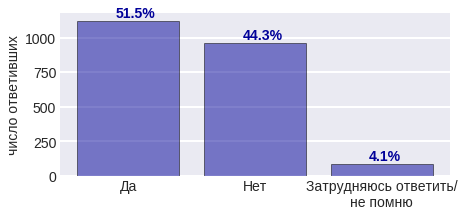

Угрожали ли вам порчей или уничтожением имущества? ['Да - 141', 'Нет - 714', 'Затрудняюсь ответить/\nне помню - 7']


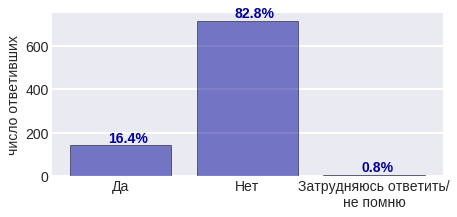

Было ли к Вам применено физическое насилие? ['Да - 350', 'Нет - 1745', 'Затрудняюсь ответить/\nне помню - 3']


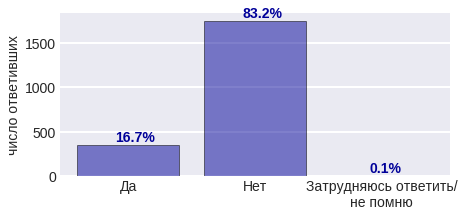

Нуждались ли Вы в медицинской помощи? ['Да - 169', 'Нет - 121']


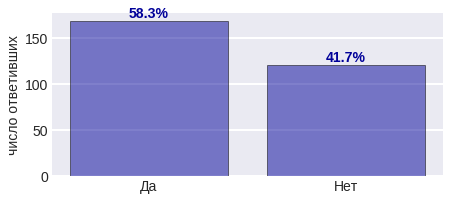

Обращались ли Вы в медицинское учреждение? ['Да - 136', 'Нет - 36']


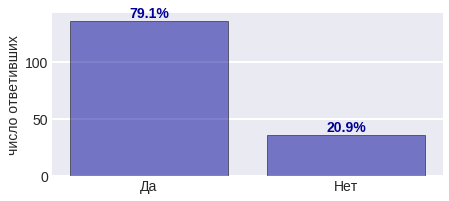

Получили ли вы в результате этого случая инвалидность? ['Да - 5', 'Нет - 130', 'Затрудняюсь ответить/\nне помню - 1']


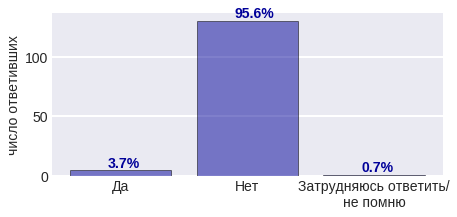

Оказывали ли Вы сопротивление преступнику? ['Да - 242', 'Нет - 106', 'Затрудняюсь ответить/\nне помню - 2']


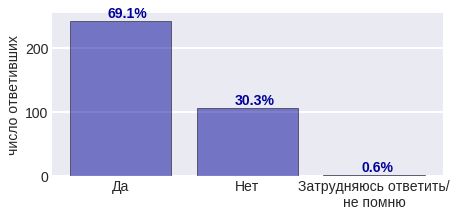

Угрожали ли Вам в этой ситуации физическим насилием? ['Да - 226', 'Нет - 2391', 'Затрудняюсь ответить/\nне помню - 4']


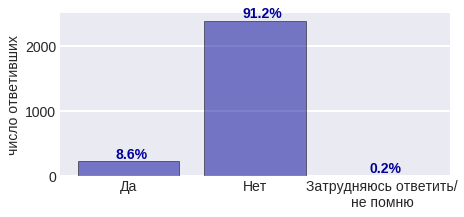

Как вы думаете, могли быть у злоумышленника сексуальные мотивы? ['Да - 68', 'Нет - 463', 'Затрудняюсь ответить/\nне помню - 45']


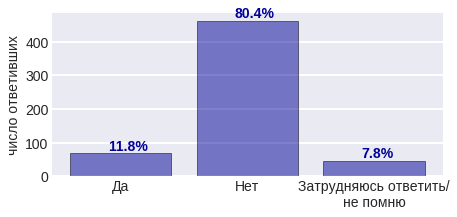

Угрожали ли Вам оружием? ['Да - 48', 'Нет - 228', 'Затрудняюсь ответить/\nне помню - 4']


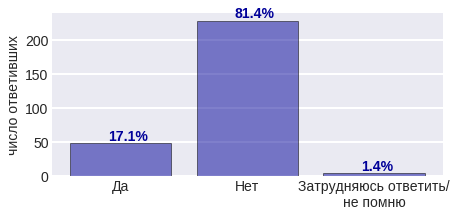

Были ли Вы в той ситуации жертвой ДТП? ['Да - 7', 'Нет - 509']


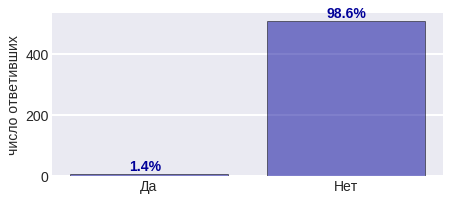

Были ли Вы в той ситуации жертвой чьей-то халатности? ['Да - 83', 'Нет - 397', 'Затрудняюсь ответить/\nне помню - 30']


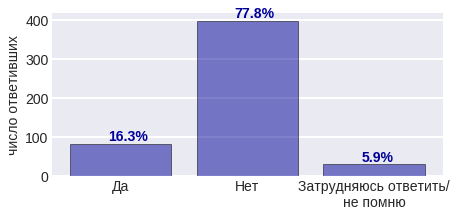

В момент преступления Вы видели злоумышленника или разговаривали с ним? ['Да - 1506', 'Нет - 1455', 'Затрудняюсь ответить/\nне помню - 40']


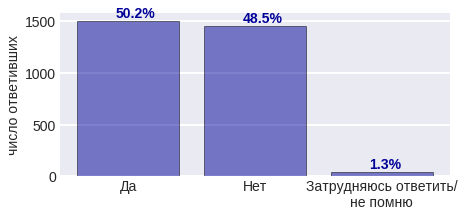

Злоумышленник был один? ['Да - 904', 'Нет - 576', 'Затрудняюсь ответить/\nне помню - 27']


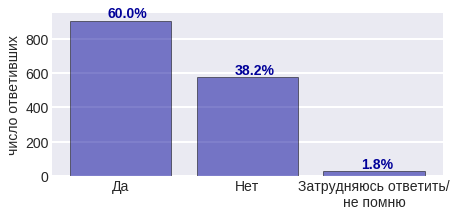

Злоумышленник был мужчина? ['Да - 317', 'Нет - 1150', 'Затрудняюсь ответить/\nне помню - 39']


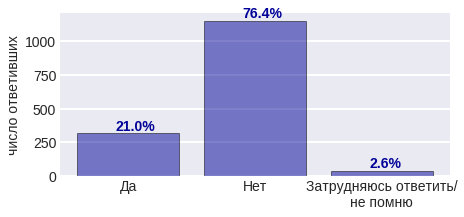

Были ли вы знакомы со злоумышленником? ['Да - 374', 'Нет - 1090', 'Затрудняюсь ответить/\nне помню - 6']


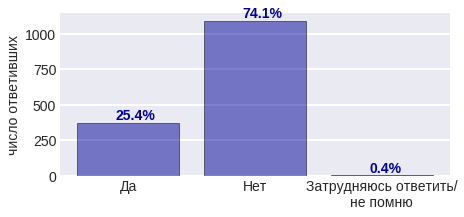

Можно ли сказать, что Вы находились в зависимом положении от преступника (он был начальником, основным кормильцем или старшим родственником)? ['Да - 86', 'Нет - 285', 'Затрудняюсь ответить/\nне помню - 3']


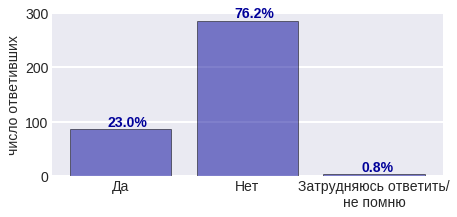

Был ли преступник или кто-нибудь из преступников в состоянии алкогольного или наркотического опьянения? ['Да - 364', 'Нет - 814', 'Затрудняюсь ответить/\nне помню - 328']


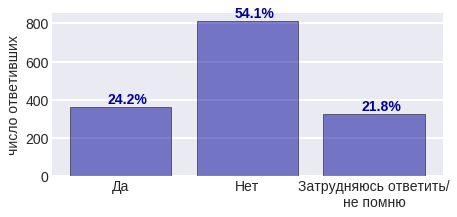

Преступление, которое мы обсуждали, было единственным или повторялось (случилось не меньше двух раз)? ['Да - 66', 'Нет - 50']


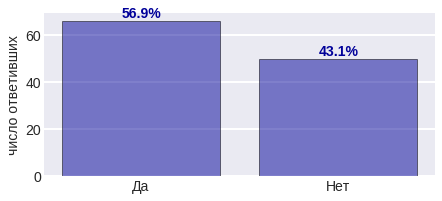

Рассказывали ли Вы кому-нибудь из близких о случившемся? ['Да - 2668', 'Нет - 328', 'Затрудняюсь ответить/\nне помню - 5']


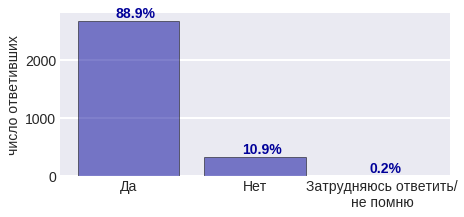

Узнали ли о случившемся правоохранительные органы? ['Да - 1447', 'Нет - 1537', 'Затрудняюсь ответить/\nне помню - 17']


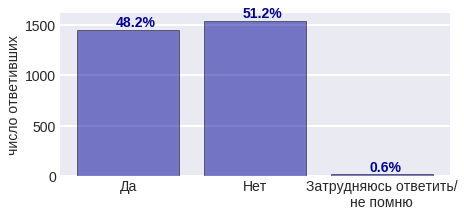

Примирились ли Вы с виновными? ['Да - 196', 'Нет - 545', 'Затрудняюсь ответить/\nне помню - 46']


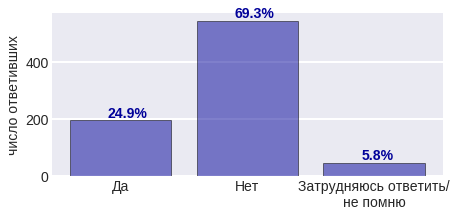

Оказавшись снова в аналогичной ситуации, Вы, скорее всего, обратились бы в полицию? ['Да - 1602', 'Нет - 1179', 'Затрудняюсь ответить/\nне помню - 220']


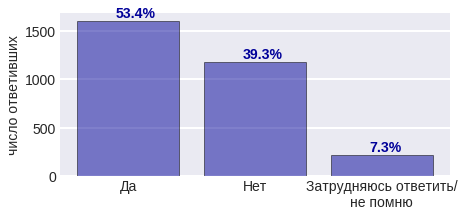

Вы проживаете один? ['Да - 1088', 'Нет - 5588', 'Затрудняюсь ответить/\nне помню - 71']


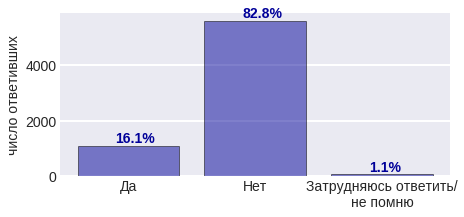

Вы работаете в настоящее время? ['Да - 4174', 'Нет - 2395']


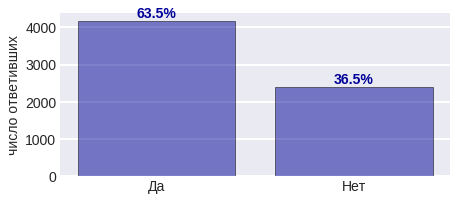

Вы учитесь в настоящее время? ['Да - 564', 'Нет - 5999']


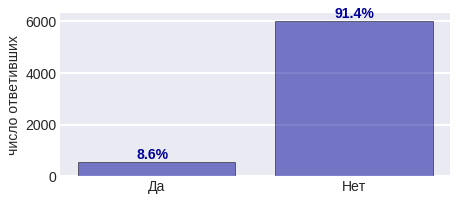

Вы получаете пенсию, пособие, стипендию от государства? ['Да - 2386', 'Нет - 3605']


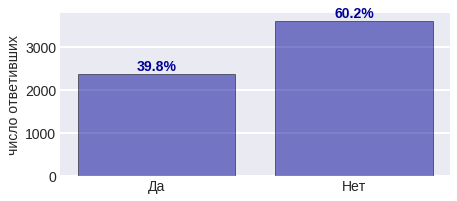

Искали ли Вы работу в течение последних 12 месяцев? ['Да - 587', 'Нет - 1560']


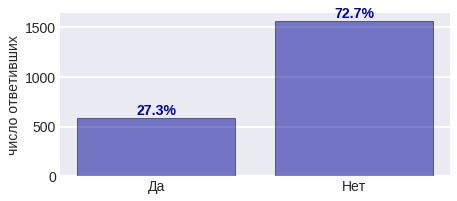

На работе Вы руководите другими людьми? ['Да - 1132', 'Нет - 2702']


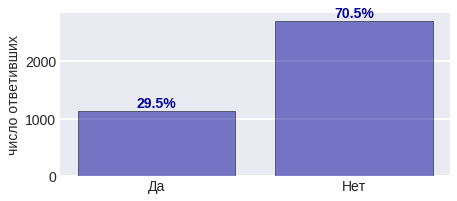

Ваша работа связана с физическим трудом? ['Да - 1430', 'Нет - 1248']


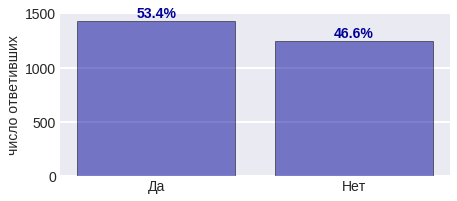

У Вас есть гражданство Российской Федерации? ['Да - 6409', 'Нет - 124']


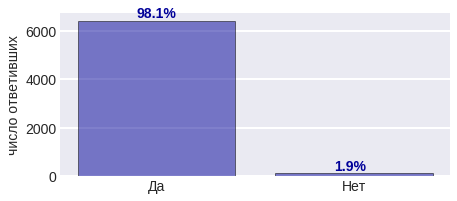

Привлекались ли Вы сами когда-нибудь к уголовной ответственности? ['Да - 425', 'Нет - 6091']


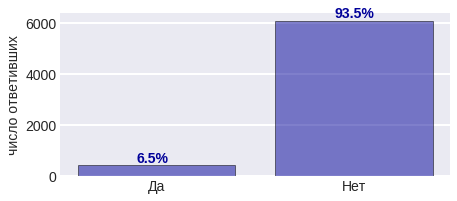

In [36]:
dict_smallquestions = {'Q22': 'Можно ли сказать, что вас обманули или ввели в заблуждение?',
                       'Q23': 'Угрожали ли вам порчей или уничтожением имущества?',
                       'Q24': 'Было ли к Вам применено физическое насилие?',
                       'Q27':  'Нуждались ли Вы в медицинской помощи?',
                       'Q28':  'Обращались ли Вы в медицинское учреждение?',
                       'Q29':  'Получили ли вы в результате этого случая инвалидность?',
                       'Q31':  'Оказывали ли Вы сопротивление преступнику?',
                       'Q33':  'Угрожали ли Вам в этой ситуации физическим насилием?',
                       'Q32':  'Как вы думаете, могли быть у злоумышленника сексуальные мотивы?',
                       'Q34':  'Угрожали ли Вам оружием?',
                       'Q36':  'Были ли Вы в той ситуации жертвой ДТП?',
                       'Q37':  'Были ли Вы в той ситуации жертвой чьей-то халатности?',
                       'Q6':  'В момент преступления Вы видели злоумышленника или разговаривали с ним?',
                       'Q7':  'Злоумышленник был один?',
                       'Q8': 'Злоумышленник был мужчина?',
                       'Q9': 'Были ли вы знакомы со злоумышленником?',
                       'Q11': 'Можно ли сказать, что Вы находились в зависимом положении от преступника (он был начальником, основным кормильцем или старшим родственником)?',
                       'Q13':  'Был ли преступник или кто-нибудь из преступников в состоянии алкогольного или наркотического опьянения?',
                       'Q38':  'Преступление, которое мы обсуждали, было единственным или повторялось (случилось не меньше двух раз)?',
                       'Q39': 'Рассказывали ли Вы кому-нибудь из близких о случившемся?',
                       'Q40':  'Узнали ли о случившемся правоохранительные органы?',
                       'Q52':  'Примирились ли Вы с виновными?',
                       'Q54':  'Оказавшись снова в аналогичной ситуации, Вы, скорее всего, обратились бы в полицию?',
                       'Q78':  'Вы проживаете один?',
                       'Q58':  'Вы работаете в настоящее время?', 
                       'Q69':  'Вы учитесь в настоящее время?', 
                       'Q70':  'Вы получаете пенсию, пособие, стипендию от государства?',  
                       'Q71':  'Искали ли Вы работу в течение последних 12 месяцев?',  
                       'Q72':  'На работе Вы руководите другими людьми?',  
                       'Q73':  'Ваша работа связана с физическим трудом?',
                       'Q60':  'У Вас есть гражданство Российской Федерации?',
                       'Q65':  'Привлекались ли Вы сами когда-нибудь к уголовной ответственности?'  
                       }

for name in dict_smallquestions:
    d = data[name].value_counts()
    d = d.sort_index()
    d.index = d.index.map(dict_short2)
    print (dict_smallquestions[name], list(d.index + ' - ' + d.astype(str))) # сам вопрос
    show_bar(d, show_percent=True, rotation=0, eps_x=-0.1, eps_y = d.max()/50, alpha=0.5, edgecolor='black') # столбцовая диаграмма
    plt.show()

# Вопросы с ответами в разных колонках

тут создаём специальную структуру данных для визуализации всех ответов

Использовалось ли что-либо в качестве оружия?
245 / 105 Нет
15 / 335 огнестрельное оружие
53 / 297 холодное оружие


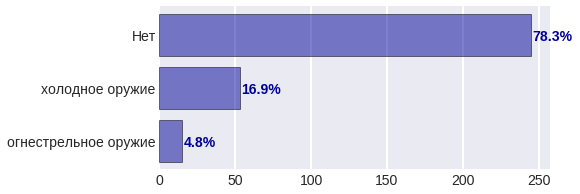

Был ли Вам причинен какой-либо физический ущерб, телесные повреждения?
59 / 291 Нет
210 / 140 синяки или ссадины
116 / 234 более серьезные повреждения


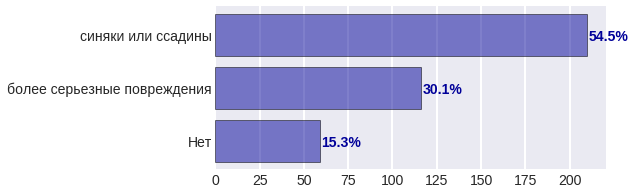

Куда именно Вы обратились?
1075 / 92 В полицию
131 / 1036 В прокуратуру
57 / 1110 В следственный комитет
4 / 1163 Затрудняюсь ответить / не помню


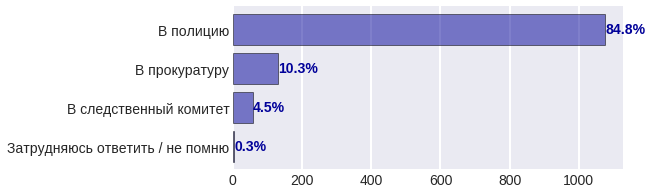

Обращались ли Вы за помощью по поводу случившегося еще к кому-нибудь, кроме правоохранительных органов?
87 / 2914 В суд
183 / 2818 К адвокатам, юристам
354 / 2647 К знакомым, близким, друзьям
65 / 2936 К частным лицам (например, частные охранные структуры)
2238 / 763 Нет, не обращались ни к кому
3 / 2998 Затрудняюсь ответить / не помню


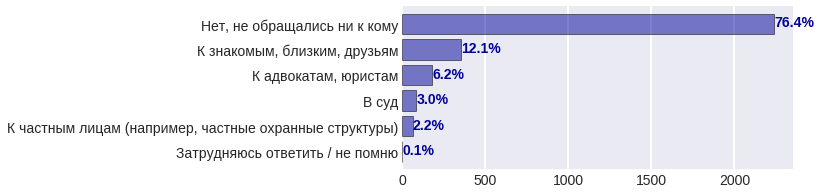

Кем работаете?
440 / 3211 предприниматель / фрилансер / самозанятый
1849 / 1802 сотрудник частной компании
1419 / 2232 сотрудник бюджетной организации


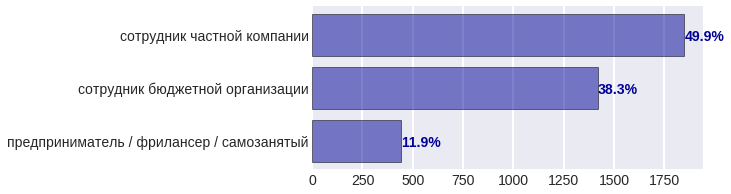

In [37]:
questions = [{'s': 'Использовалось ли что-либо в качестве оружия?',
              'dct':{'Q25_1': 'Нет',
           'Q25_2':  'огнестрельное оружие',
           'Q25_3':  'холодное оружие'}},
            {'s': 'Был ли Вам причинен какой-либо физический ущерб, телесные повреждения?',
              'dct':{'Q26_1': 'Нет',
           'Q26_2':  'синяки или ссадины',
           'Q26_3':  'более серьезные повреждения'}},
            {'s': 'Куда именно Вы обратились?',
              'dct':{'Q42_1': 'В полицию',
           'Q42_2':  'В прокуратуру',
           'Q42_3':  'В следственный комитет',
           'Q42_999':  'Затрудняюсь ответить / не помню'}},
            {'s': 'Обращались ли Вы за помощью по поводу случившегося еще к кому-нибудь, кроме правоохранительных органов?',
              'dct':{'Q47_1': 'В суд',
           'Q47_2':  'К адвокатам, юристам',
           'Q47_3':  'К знакомым, близким, друзьям',
           'Q47_4':  'К частным лицам (например, частные охранные структуры)',
           'Q47_888':  'Нет, не обращались ни к кому',
           'Q47_999':  'Затрудняюсь ответить / не помню'}},           
             {'s': 'Кем работаете?',
              'dct':{'Q74_1': 'предприниматель / фрилансер / самозанятый',
           'Q74_2':  'сотрудник частной компании',
           'Q74_3':  'сотрудник бюджетной организации'}}            ]


for q in questions:
    print (q['s'])
    show_barh(make_sums(data, q['dct']), figsize=(7,3),
              eps_x=1, eps_y=-0.1,
              alpha=0.5, edgecolor='black')
    plt.show()
    

## Вопросы с нестандартными ответами

Преступник был должностным лицом или при исполнении служебных обязанностей?


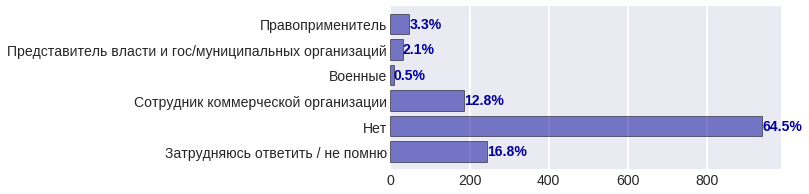

Кто обратился в правоохранительные органы?


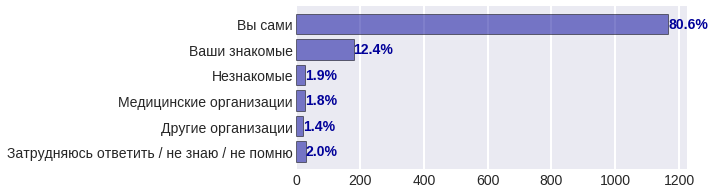

Как именно Вы обратились в полицию?


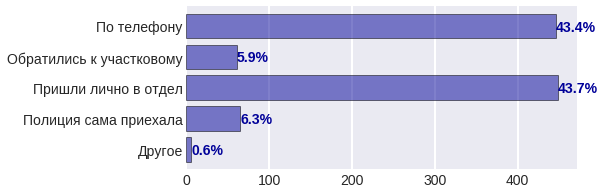

Как быстро полиция приехала после Вашего звонка?


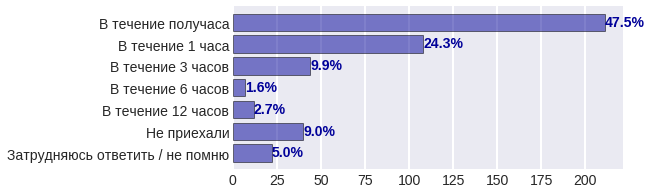

Сколько раз Вы встречались с сотрудниками правоохранительных органов?


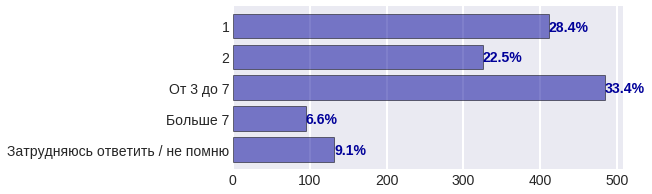

В результате, они возбудили уголовное или административное дело?


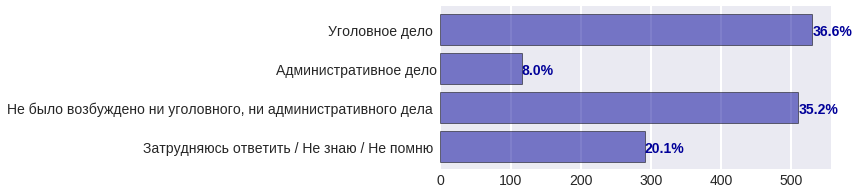

Дошло ли дело до суда?


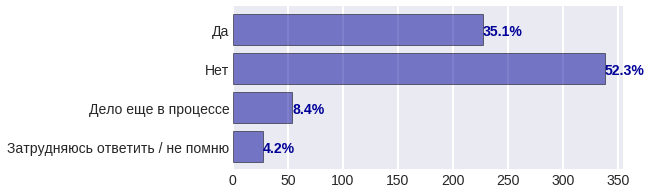

Был ли установлен виновный или кто-либо из виновных, если их было несколько?


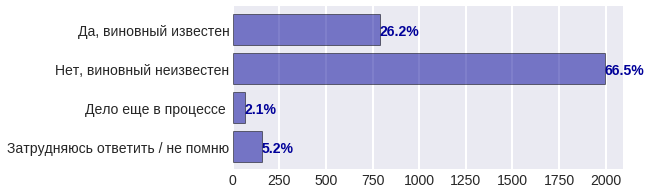

Кем был найден виновный или кто-либо из виновных, если их было несколько?


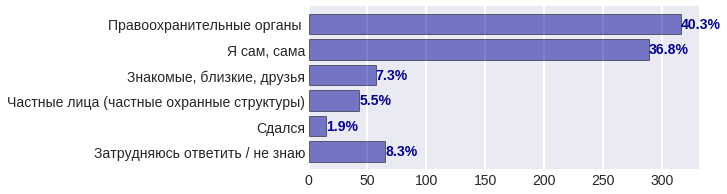

Получил ли наказание виновный или кто-либо из виновных, если их было несколько?


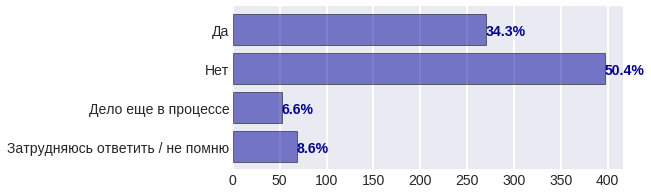

Добивались ли Вы материальной компенсации? Если да, то удалось ли ее добиться?


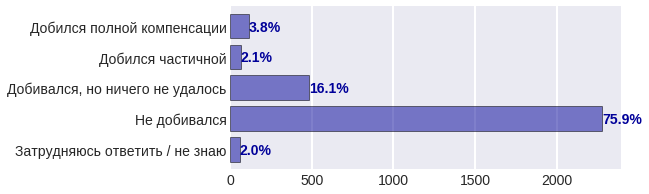

Состоите ли Вы в браке?


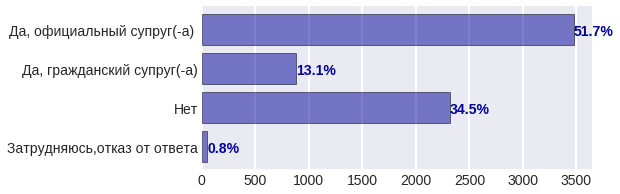

Как бы вы определили свой уровень дохода?


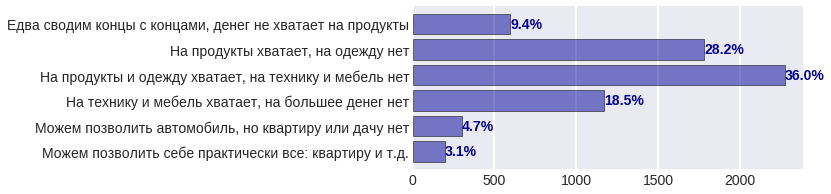

Какое у Вас образование?


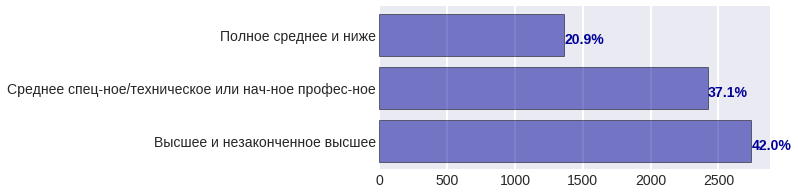

Есть ли среди Ваших знакомых работники правоохранительных органов или Вы сами там работаете или работали?


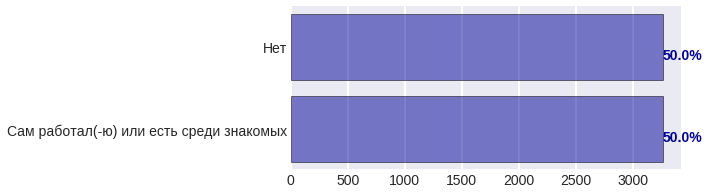

In [38]:
questions = [{'s': 'Преступник был должностным лицом или при исполнении служебных обязанностей?',
              'n': 'Q12',
              'dct':{1: 'Правоприменитель',
                     2: 'Представитель власти и гос/муниципальных организаций',
                     3: 'Военные',
                     4: 'Сотрудник коммерческой организации',
                     5: 'Нет',
                     6: 'Затрудняюсь ответить / не помню'}},
            {'s': 'Кто обратился в правоохранительные органы?',
              'n': 'Q41',
              'dct':{1: 'Вы сами',
                     2: 'Ваши знакомые',
                     3: 'Незнакомые',
                     4: 'Медицинские организации',
                     5: 'Другие организации',
                     6: 'Затрудняюсь ответить / не знаю / не помню'}},
            {'s': 'Как именно Вы обратились в полицию?',
              'n': 'Q43',
              'dct':{1: 'По телефону',
                     2: 'Обратились к участковому',
                     3: 'Пришли лично в отдел',
                     4: 'Полиция сама приехала',
                     5: 'Другое'}},
            {'s': 'Как быстро полиция приехала после Вашего звонка?',
              'n': 'Q44',
              'dct':{1: 'В течение получаса',
                     2: 'В течение 1 часа',
                     3: 'В течение 3 часов',
                     4: 'В течение 6 часов',
                     5: 'В течение 12 часов',
                     6: 'Не приехали',  
                     7: 'Затрудняюсь ответить / не помню'}},
            {'s': 'Сколько раз Вы встречались с сотрудниками правоохранительных органов?',
              'n': 'Q45',
              'dct':{1: '1',
                     2: '2',
                     3: 'От 3 до 7',
                     4: 'Больше 7',
                     5: 'В течение 12 часов', # ???!!
                     6: 'Затрудняюсь ответить / не помню'}},
            {'s': 'В результате, они возбудили уголовное или административное дело?',
              'n': 'Q46',
              'dct':{1: 'Уголовное дело ',
                     2: 'Административное дело',
                     3: 'Не было возбуждено ни уголовного, ни административного дела ',
                     4: 'Затрудняюсь ответить / Не знаю / Не помню '}},
            {'s': 'Дошло ли дело до суда?',
              'n': 'Q68',
              'dct':{1: 'Да',
                     2: 'Нет',
                     3: 'Дело еще в процессе',
                     4: 'Затрудняюсь ответить / не помню'}},
            {'s': 'Был ли установлен виновный или кто-либо из виновных, если их было несколько?',
              'n': 'Q49',
              'dct':{1: 'Да, виновный известен',
                     2: 'Нет, виновный неизвестен',
                     3: 'Дело еще в процессе ',
                     4: 'Затрудняюсь ответить / не помню'}},
            {'s': 'Кем был найден виновный или кто-либо из виновных, если их было несколько?',
              'n': 'Q50',
              'dct':{1: 'Правоохранительные органы ',
                     2: 'Я сам, сама',
                     3: 'Знакомые, близкие, друзья',
                     4: 'Частные лица (частные охранные структуры)',
                     5: 'Сдался',
                     6: 'Затрудняюсь ответить / не знаю'}},
            {'s': 'Получил ли наказание виновный или кто-либо из виновных, если их было несколько?',
              'n': 'Q51',
              'dct':{1: 'Да',
                     2: 'Нет',
                     3: 'Дело еще в процессе',
                     4: 'Затрудняюсь ответить / не помню'}},
            {'s': 'Добивались ли Вы материальной компенсации? Если да, то удалось ли ее добиться?',
              'n': 'Q53',
              'dct':{1: 'Добился полной компенсации',
                     2: 'Добился частичной',
                     3: 'Добивался, но ничего не удалось',
                     4: 'Не добивался',
                     5: 'Затрудняюсь ответить / не знаю'}},
            {'s': 'Состоите ли Вы в браке?',
              'n': 'Q79',
              'dct':{1: 'Да, официальный супруг(-а) ',
                     2: 'Да, гражданский супруг(-а)',
                     3: 'Нет',
                     4: 'Затрудняюсь,отказ от ответа'}},
            {'s': 'Как бы вы определили свой уровень дохода?',
              'n': 'Q57',
              'dct':{1: 'Едва сводим концы с концами, денег не хватает на продукты',
                     2: 'На продукты хватает, на одежду нет',
                     3: 'На продукты и одежду хватает, на технику и мебель нет',
                     4: 'На технику и мебель хватает, на большее денег нет',
                     5: 'Можем позволить автомобиль, но квартиру или дачу нет',
                     6: 'Можем позволить себе практически все: квартиру и т.д.'}},
             {'s': 'Какое у Вас образование?',
              'n': 'Q61',
              'dct':{1: 'Полное среднее и ниже',
                     2: 'Среднее спец-ное/техническое или нач-ное профес-ное',
                     3: 'Высшее и незаконченное высшее'}},
             {'s': 'Есть ли среди Ваших знакомых работники правоохранительных органов или Вы сами там работаете или работали?',
              'n': 'Q64',
              'dct':{1: 'Нет',
                     2: 'Сам работал(-ю) или есть среди знакомых'}}           
            ]



for q in questions:
    print (q['s'])
    d = data[q['n']].value_counts()
    d = d.sort_index(ascending=False)
    d.index = d.index.map(q['dct'])
    #print (dict_smallquestions[name], list(d.index + ' - ' + d.astype(str))) # сам вопрос
    show_barh(d, show_percent=True, eps_x=0, eps_y = -0.15, alpha=0.5, edgecolor='black') # столбцовая диаграмма

    plt.show()
    

In [ ]:
Q1 Q2  Q78 Q79 Q80 Q80_1N Q57 Q58 Q69 Q70 Q71 Q72 Q73 Q74_1 Q74_2 Q74_3 Q60 Q61 Q64 Q65
 
Q80  Сколько человек, считая Вас, живет с Вами вместе и ведет общее хозяйство?  Q78 = 2  1: Затрудняюсь ответить  
2: Размер домохозяйства  
Q80_1N  Размер домохозяйства  


 

  

    
 


## Предиктивная аналитика

пытаемся по описанию человека определить вероятность того, что он станет жертвой преступления

сначала не совсем корректная модель, т.к. если вопросы не задавались => преступления не было

In [39]:
# признаки описания
features = ['Q1', 'Q2', 'Q78', 'Q79', 'Q80', 'Q80_1N', 'Q57', 'Q58', 'Q69', 'Q70',
            'Q71', 'Q72', 'Q73', 'Q74_1', 'Q74_2', 'Q74_3', 'Q60', 'Q61', 'Q64', 'Q65']

# подготавливаем данные
X = data[features].fillna(-1)
y = data.Q75.map({1:1, 2:0, 3:100}).values

# убрать тех, кто затруднился ответить
X2 = X[y >=3]
X = X[y < 3]
y = y[y < 3]
# только два класса: жертва / нет

print (X.shape, y.shape, X2.shape)

(16777, 20) (16777,) (41, 20)


/home/dash/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:394: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0.2594878236172954


Text(0,0.5,'log_loss')

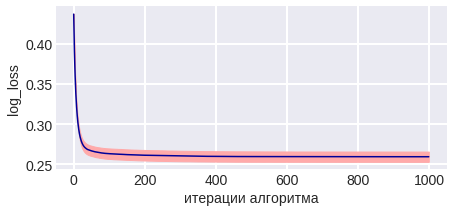

In [40]:
import lightgbm as lgb

params = {'objective': 'binary', 'num_leaves': 2, 'num_boost_round':1000}

stat = lgb.cv(params=params, train_set=lgb.Dataset(X, y), nfold=10)

print (np.min(stat['binary_logloss-mean']))
plt.figure(figsize=(7, 3))
plt.plot(np.arange(len(stat['binary_logloss-mean'])), stat['binary_logloss-mean'], color='#000099')
plt.fill_between(np.arange(len(stat['binary_logloss-mean'])), y1=np.array(stat['binary_logloss-mean'])-np.array(stat['binary_logloss-stdv']),
                y2=np.array(stat['binary_logloss-mean'])+np.array(stat['binary_logloss-stdv']),
                color='#FFAAAA')
plt.grid(lw=2)
plt.xlabel('итерации алгоритма')
plt.ylabel('log_loss')

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
model = lgb.LGBMClassifier(num_leaves=2, n_estimators=1000)
a = cross_val_predict(model, X, y, cv=10)
tn, fp, fn, tp = confusion_matrix(y, a).ravel()
print (tn, fp, fn, tp)
cm = confusion_matrix(y, a)
show_confusion_matrix(cm)

11887 1889 1613 1388


,$a=0$,$a=1$
$y=0$,TN = 11887,FP = 1889
$y=1$,FN = 1613,TP = 1388


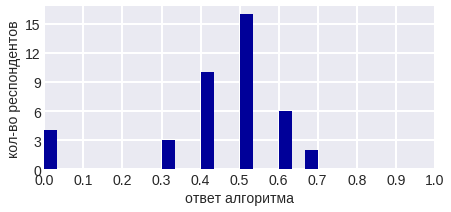

In [42]:
# как алгоритм работает на описаниях тех, кто не сказал про преступления

model.fit(X, y)
a = model.predict_proba(X2)

plt.figure(figsize=(7, 3))
plt.hist(np.round(a[:,1], 1), bins=21, color='#000099');
plt.xlim([0, 1])
plt.xlabel('ответ алгоритма')
plt.ylabel('кол-во респондентов')
plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 15, 6))
plt.grid(lw=2)

In [43]:
pd.Series(dict(zip(X.columns, model.feature_importances_)))

Q1          9
Q2        225
Q78       168
Q79        22
Q80       150
Q80_1N      9
Q57        66
Q58         0
Q69         0
Q70        19
Q71        51
Q72        18
Q73        34
Q74_1      36
Q74_2       7
Q74_3      20
Q60        10
Q61        31
Q64        13
Q65       112
dtype: int64

важности признаков


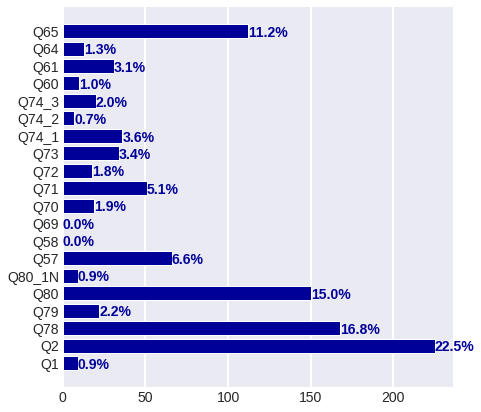

In [44]:
print ('важности признаков')
show_barh(pd.Series(dict(zip(X.columns, model.feature_importances_))), eps_y=-0.3,
          figsize=(7, 7))

## если смотреть скатерплоты признаков

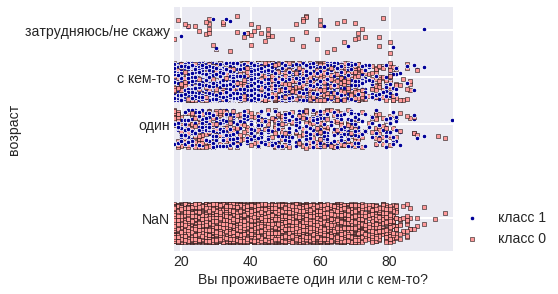

In [55]:
show_scatter(X.Q2.values, X.Q78.values -0.5 + 0.8*np.random.rand(X.shape[0]), y,
             xlabel='Вы проживаете один или с кем-то?', ylabel='возраст', random=True)
plt.yticks([-1,1,2,3], ['NaN', 'один', 'с кем-то', 'затрудняюсь/не скажу']);

# plt.figure(figsize=(10, 5))
# plt.scatter(X.Q2.values[y==1], (X.Q78.values [y==1], 20, c='#000099')
# plt.scatter(X.Q2.values[y==0], (X.Q78.values + 0.5*np.random.rand(X.shape[0]))[y==0], 20, c='#FFAAAA')

# plt.ylabel('Вы проживаете один или с кем-то?')
# plt.xlabel('возраст');

## Аналитика на более правильных данных


устранили тех, кто не отвечал на вопросы

In [56]:
# признаки описания
features = ['Q1', 'Q2', 'Q78', 'Q79', 'Q80', 'Q80_1N', 'Q57', 'Q58', 'Q69', 'Q70',
            'Q71', 'Q72', 'Q73', 'Q74_1', 'Q74_2', 'Q74_3', 'Q60', 'Q61', 'Q64', 'Q65']

# подготавливаем данные
y = data[~data.Q80.isnull()].Q75.map({1:1, 2:0, 3:100}).values
X = data[~data.Q80.isnull()][features].fillna(-1)

# убрать тех, кто затруднился ответить
X2 = X[y >=3]
X = X[y < 3]
y = y[y < 3]

# только два класса: жертва / нет
print (X.shape, y.shape, X2.shape)

(5796, 20) (5796,) (34, 20)


/home/dash/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:394: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0.6530580623499012


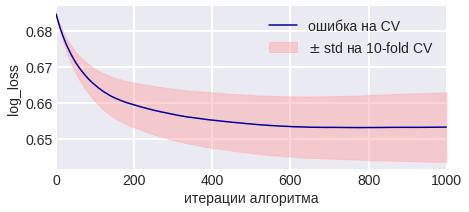

In [57]:
import lightgbm as lgb

params = {'objective': 'binary', 'num_leaves': 4, 'num_boost_round':1000, 'learning_rate': 0.01}

stat = lgb.cv(params=params, train_set=lgb.Dataset(X, y), nfold=10)

print (np.min(stat['binary_logloss-mean']))
plt.figure(figsize=(7, 3))
plt.plot(np.arange(len(stat['binary_logloss-mean'])), stat['binary_logloss-mean'],
         color='#000099', label='ошибка на CV')
plt.fill_between(np.arange(len(stat['binary_logloss-mean'])), y1=np.array(stat['binary_logloss-mean'])-np.array(stat['binary_logloss-stdv']),
                y2=np.array(stat['binary_logloss-mean'])+np.array(stat['binary_logloss-stdv']),
                color='#FFAAAA', alpha=0.5, label='$\pm$ std на 10-fold CV')

plt.grid(lw=2)
plt.xlabel('итерации алгоритма')
plt.ylabel('log_loss')
plt.xlim([0, 1000])
plt.legend()

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
model = lgb.LGBMClassifier(num_leaves=4, learning_rate=0.01, n_estimators=1000)
a = cross_val_predict(model, X, y, cv=10)
tn, fp, fn, tp = confusion_matrix(y, a).ravel()
print (tn, fp, fn, tp)
cm = confusion_matrix(y, a)
show_confusion_matrix(cm)

2493 773 1607 923


,$a=0$,$a=1$
$y=0$,TN = 2493,FP = 773
$y=1$,FN = 1607,TP = 923


Text(0,0.5,'признаки')

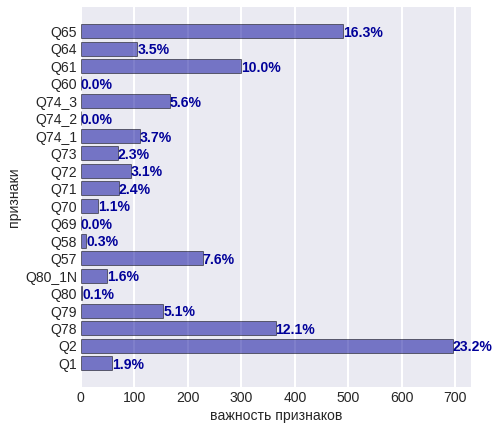

In [59]:
model.fit(X, y)
a = model.predict_proba(X2)

show_barh(pd.Series(dict(zip(X.columns, model.feature_importances_))), eps_y=-0.3,
          figsize=(7, 7), alpha=0.5, edgecolor='black')
plt.xlabel('важность признаков')
plt.ylabel('признаки')

### Важный признак

**Q65** Привлекались ли Вы сами когда-нибудь к уголовной ответственности?

In [60]:
df = pd.crosstab(data.Q65, data.Q75)
df.index = ['да', 'нет']
df.columns = ['да', 'нет', 'не знаю']
df

,да,нет,не знаю
да,226,195,4
нет,2775,3283,33


In [61]:
df = (100 * show_probabilities(data, name='Q65', target='Q75', target_0=2, target_1=1)).round(1)
df.index = ['да', 'нет']
df.columns = [r'процент']
#df[r'процент']  = df[r'процент'] + '%'
df.astype(str) + '%'

,процент
да,53.7%
нет,45.8%


 **Q78** Скажите, Вы проживаете один или с кем-то?

In [62]:
df = pd.crosstab(data.Q78, data.Q75)
df.index = ['один', 'с кем-то', 'затрудняюсь/не скажу']
df.columns = ['да', 'нет', 'не знаю']
df

,да,нет,не знаю
один,509,573,6
с кем-то,2481,3076,31
затрудняюсь/не скажу,11,60,0


In [63]:
df = (100 * show_probabilities(data, name='Q78', target='Q75', target_0=2, target_1=1)).round(1)
df.index = ['один', 'с кем-то', 'затрудняюсь/не скажу']
df.columns = [r'процент']
#df[r'процент']  = df[r'процент'] + '%'
df.astype(str) + '%'

,процент
один,47.0%
с кем-то,44.6%
затрудняюсь/не скажу,15.5%


 **Q61** Какое у Вас образование?

In [64]:
df = pd.crosstab(data.Q61, data.Q75)
df.index = ['Полное среднее и ниже', 'Среднее спец-ное/техническое или нач-ное профес-ное', 'Высшее и незаконченное высшее']
df.columns = ['да', 'нет', 'не знаю']
df

,да,нет,не знаю
Полное среднее и ниже,543,813,7
Среднее спец-ное/техническое или нач-ное профес-ное,1060,1348,14
Высшее и незаконченное высшее,1398,1329,16


In [65]:
df = (100 * show_probabilities(data, name='Q61', target='Q75', target_0=2, target_1=1)).round(1)
df.index = ['Полное среднее и ниже', 'Среднее спец-ное/техническое или нач-ное профес-ное', 'Высшее и незаконченное высшее']
df.columns = [r'процент']
#df[r'процент']  = df[r'процент'] + '%'
df.astype(str) + '%'

,процент
Полное среднее и ниже,40.0%
Среднее спец-ное/техническое или нач-ное профес-ное,44.0%
Высшее и незаконченное высшее,51.3%


 **Q57** Как бы вы определили свой уровень дохода?

In [66]:
df = pd.crosstab(data.Q57, data.Q75)
df.index = ['Едва сводим концы с концами, денег не хватает на продукты',
            'На продукты хватает, на одежду нет',
            'На продукты и одежду хватает, на технику и мебель нет',
            'На технику и мебель хватает, на большее денег нет',
            'Можем позволить автомобиль, но квартиру или дачу нет',
            'Можем позволить себе практически все: квартиру и т.д.']
df.columns = ['да', 'нет', 'не знаю']
df

,да,нет,не знаю
"Едва сводим концы с концами, денег не хватает на продукты",294,297,5
"На продукты хватает, на одежду нет",800,969,13
"На продукты и одежду хватает, на технику и мебель нет",1040,1227,8
"На технику и мебель хватает, на большее денег нет",552,612,7
"Можем позволить автомобиль, но квартиру или дачу нет",137,159,3
Можем позволить себе практически все: квартиру и т.д.,87,109,0


In [67]:
df = (100*show_probabilities(data, name='Q57', target='Q75', target_0=2, target_1=1)).round(1)
df.index = ['Едва сводим концы с концами, денег не хватает на продукты',
            'На продукты хватает, на одежду нет',
            'На продукты и одежду хватает, на технику и мебель нет',
            'На технику и мебель хватает, на большее денег нет',
            'Можем позволить автомобиль, но квартиру или дачу нет',
            'Можем позволить себе практически все: квартиру и т.д.']
df.columns = [r'вероятность']
df.astype(str) + '%'


,вероятность
"Едва сводим концы с концами, денег не хватает на продукты",49.7%
"На продукты хватает, на одежду нет",45.2%
"На продукты и одежду хватает, на технику и мебель нет",45.9%
"На технику и мебель хватает, на большее денег нет",47.4%
"Можем позволить автомобиль, но квартиру или дачу нет",46.3%
Можем позволить себе практически все: квартиру и т.д.,44.4%


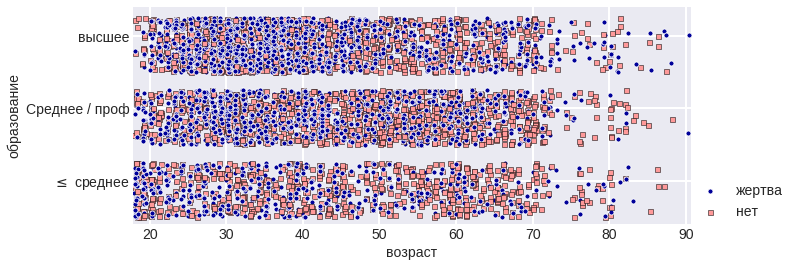

In [71]:
show_scatter(X.Q2.values + 0.5*np.random.rand(X.shape[0]),
             X.Q61.values+ 0.75*np.random.rand(X.shape[0]) - 0.5,
             y,
             size=25,
             figsize=(10, 4),
             random=True,
             xlabel='возраст', ylabel='образование',
             class1 = 'жертва', class0='нет'
            );
plt.ylim([0.4, 3.4])
plt.yticks([1, 2, 3], ['$\leq$ среднее', 'Среднее / проф', 'высшее']);


In [70]:
df = (100 * show_probabilities(data[(data.Q2 >= 18) & (data.Q2 < 30)], name='Q61', target='Q75', target_0=2, target_1=1)).round(1)
df.index = ['Полное среднее и ниже', 'Среднее спец-ное/техническое или нач-ное профес-ное', 'Высшее и незаконченное высшее']
df.columns = [r'18-29']
#df[r'процент']  = df[r'процент'] + '%'


df2 = (100 * show_probabilities(data[(data.Q2 >= 30) & (data.Q2 < 50)], name='Q61', target='Q75', target_0=2, target_1=1)).round(1)
df2.index = ['Полное среднее и ниже', 'Среднее спец-ное/техническое или нач-ное профес-ное', 'Высшее и незаконченное высшее']
df2.columns = [r'30-49']
#df[r'процент']  = df[r'процент'] + '%'



df3 = (100 * show_probabilities(data[(data.Q2 >= 50) & (data.Q2 < 99)], name='Q61', target='Q75', target_0=2, target_1=1)).round(1)
df3.index = ['Полное среднее и ниже', 'Среднее спец-ное/техническое или нач-ное профес-ное', 'Высшее и незаконченное высшее']
df3.columns = [r'49-99']
#df[r'процент']  = df[r'процент'] + '%'


pd.concat([df, df2, df3], axis=1).astype(str) + '%'

,18-29,30-49,49-99
Полное среднее и ниже,47.6%,40.9%,34.1%
Среднее спец-ное/техническое или нач-ное профес-ное,49.0%,45.3%,40.4%
Высшее и незаконченное высшее,51.6%,53.4%,47.3%
